# Collab Setup

In [1]:
# Menghubungkan antara google colab dengan google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os #directories, join path
import glob
import cv2
import cv2 as cv
import numpy as np
import pandas as pd
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import joblib
import seaborn as sns
import re

In [3]:
cv2.__version__

'4.7.0'

##### Fungsi Heatmap

In [ ]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw=None, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (M, N).
    row_labels
        A list or array of length M with the labels for the rows.
    col_labels
        A list or array of length N with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if ax is None:
        ax = plt.gca()

    if cbar_kw is None:
        cbar_kw = {}

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Show all ticks and label them with the respective list entries.
    ax.set_xticks(np.arange(data.shape[1]), labels=col_labels)
    ax.set_yticks(np.arange(data.shape[0]), labels=row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=False, bottom=True,
                   labeltop=False, labelbottom=True)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "white"),
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A pair of colors.  The first is used for values below a threshold,
        the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

# Pengumpulan Data

### Cardboard - Kardus
Kelas hanya berisi kardus. Berbeda dengan kertas, kardus lebih keras dan memiliki banyak lapisan kertas
403 Citra

In [ ]:
cb1 = cv2.imread("/content/drive/MyDrive/Skripsi/dataset-resized/cardboard/cardboard1.jpg",1)
cb1 = cv2.cvtColor(cb1, cv2.COLOR_BGR2RGB)
cb2 = cv2.imread("/content/drive/MyDrive/Skripsi/dataset-resized/cardboard/cardboard166.jpg",1)
cb2 = cv2.cvtColor(cb2, cv2.COLOR_BGR2RGB)
cb3 = cv2.imread("/content/drive/MyDrive/Skripsi/dataset-resized/cardboard/cardboard190.jpg",1)
cb3 = cv2.cvtColor(cb3, cv2.COLOR_BGR2RGB)

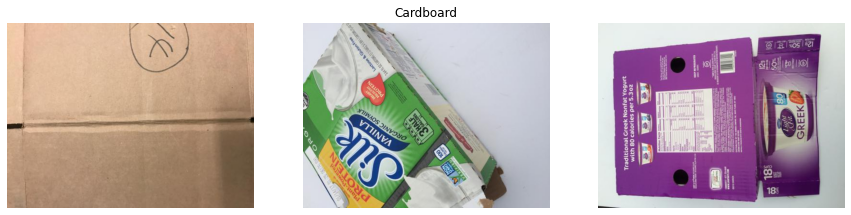

In [ ]:
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,3,1),plt.imshow(cb1),plt.axis("off")
plt.subplot(1,3,2),plt.imshow(cb2),plt.axis("off")
plt.title('Cardboard'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(cb3),plt.axis("off")
plt.show()

### Glass - Kaca
Kelas berisi produk kaca seperti botol kaca, cangkir kaca, dan toples kaca
501 Citra

In [ ]:
gl1 = cv2.imread("/content/drive/MyDrive/Skripsi/dataset-resized/glass/glass1.jpg",1)
gl1 = cv2.cvtColor(gl1, cv2.COLOR_BGR2RGB)
gl2 = cv2.imread("/content/drive/MyDrive/Skripsi/dataset-resized/glass/glass3.jpg",1)
gl2 = cv2.cvtColor(gl2, cv2.COLOR_BGR2RGB)
gl3 = cv2.imread("/content/drive/MyDrive/Skripsi/dataset-resized/glass/glass65.jpg",1)
gl3 = cv2.cvtColor(gl3, cv2.COLOR_BGR2RGB)

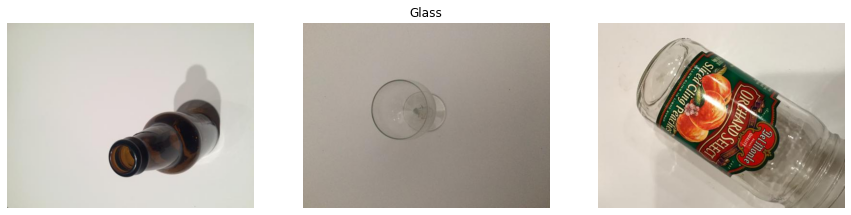

In [ ]:
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,3,1),plt.imshow(gl1),plt.axis("off")
plt.subplot(1,3,2),plt.imshow(gl2),plt.axis("off")
plt.title('Glass'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(gl3),plt.axis("off")
plt.show()

### Metal - Logam
Kelas berisi produk logam seperti kaleng dan aluminium foil
410 Citra

In [ ]:
mt1 = cv2.imread("/content/drive/MyDrive/Skripsi/dataset-resized/metal/metal1.jpg",1)
mt1 = cv2.cvtColor(mt1, cv2.COLOR_BGR2RGB)
mt2 = cv2.imread("/content/drive/MyDrive/Skripsi/dataset-resized/metal/metal44.jpg",1)
mt2 = cv2.cvtColor(mt2, cv2.COLOR_BGR2RGB)
mt3 = cv2.imread("/content/drive/MyDrive/Skripsi/dataset-resized/metal/metal65.jpg",1)
mt3 = cv2.cvtColor(mt3, cv2.COLOR_BGR2RGB)

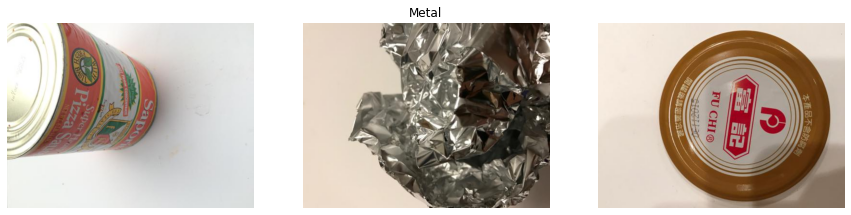

In [ ]:
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,3,1),plt.imshow(mt1),plt.axis("off")
plt.subplot(1,3,2),plt.imshow(mt2),plt.axis("off")
plt.title('Metal'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(mt3),plt.axis("off")
plt.show()

### Paper - Kertas
Kelas hanya berisi kertas. Berbeda dengan kardus, kertas hanya memiliki satu lapisan
594 Citra

In [ ]:
pp1 = cv2.imread("/content/drive/MyDrive/Skripsi/dataset-resized/paper/paper1.jpg",1)
pp1 = cv2.cvtColor(pp1, cv2.COLOR_BGR2RGB)
pp2 = cv2.imread("/content/drive/MyDrive/Skripsi/dataset-resized/paper/paper74.jpg",1)
pp2 = cv2.cvtColor(pp2, cv2.COLOR_BGR2RGB)
pp3 = cv2.imread("/content/drive/MyDrive/Skripsi/dataset-resized/paper/paper119.jpg",1)
pp3 = cv2.cvtColor(pp3, cv2.COLOR_BGR2RGB)

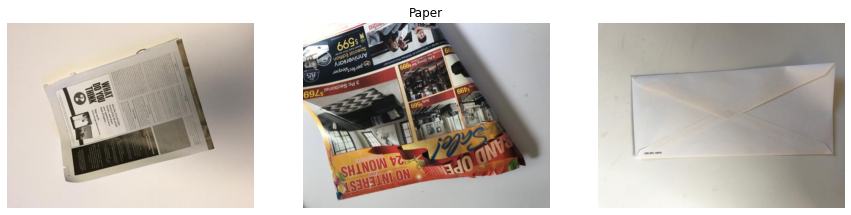

In [ ]:
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,3,1),plt.imshow(pp1),plt.axis("off")
plt.subplot(1,3,2),plt.imshow(pp2),plt.axis("off")
plt.title('Paper'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(pp3),plt.axis("off")
plt.show()

### Plastic - Plastik
Kelas berisi produk plastik seperti botol dan wadah plastik
482 Citra

In [ ]:
pl1 = cv2.imread("/content/drive/MyDrive/Skripsi/dataset-resized/plastic/plastic1.jpg",1)
pl1 = cv2.cvtColor(pl1, cv2.COLOR_BGR2RGB)
pl2 = cv2.imread("/content/drive/MyDrive/Skripsi/dataset-resized/plastic/plastic47.jpg",1)
pl2 = cv2.cvtColor(pl2, cv2.COLOR_BGR2RGB)
pl3 = cv2.imread("/content/drive/MyDrive/Skripsi/dataset-resized/plastic/plastic125.jpg",1)
pl3 = cv2.cvtColor(pl3, cv2.COLOR_BGR2RGB)

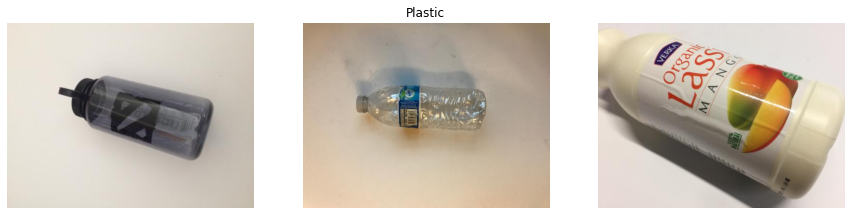

In [ ]:
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,3,1),plt.imshow(pl1),plt.axis("off")
plt.subplot(1,3,2),plt.imshow(pl2),plt.axis("off")
plt.title('Plastic'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(pl3),plt.axis("off")
plt.show()

# Prapemrosesan Data

#### Konversi RGB ke Grayscale & HSV

In [ ]:
# Get directory of image
img_dir = "/content/drive/MyDrive/Skripsi/dataset-resized/cardboard/cardboard1.jpg"

 # Reading Image
img = cv2.imread(img_dir)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # convert BGR(opencv format) to RGB format
img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV) # convert RGB to HSV format
img_gray = cv.imread(img_dir, 0)
img_gray_filter = cv.GaussianBlur(img_gray,(5,5),0)
img_adaptive_mean = cv.adaptiveThreshold(img_gray_filter,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY_INV,21,2)
img_adaptive_mean = cv.cvtColor(img_adaptive_mean, cv.COLOR_BGR2RGB)

In [ ]:
preprocessing_path = "/content/drive/MyDrive/Skripsi/Prapemrosesan Data"

cv.imwrite(os.path.join(preprocessing_path , "Citra Cardboard1 RGB.jpg"), img)
cv.imwrite(os.path.join(preprocessing_path , "Citra Cardboard1 Gray.jpg"), img_gray)
cv.imwrite(os.path.join(preprocessing_path , "Citra Cardboard1 HSV.jpg"), img_hsv)
cv.imwrite(os.path.join(preprocessing_path , "Citra Cardboard1 Gray Hasil Filter.jpg"), img_gray_filter)

True

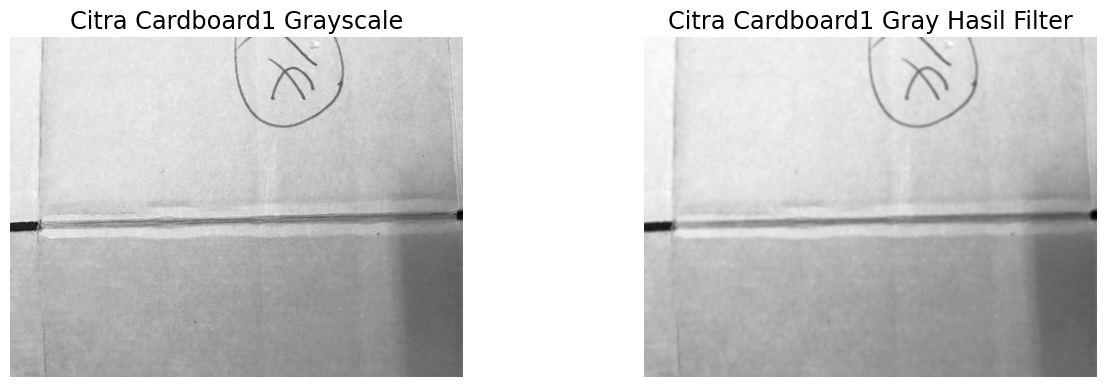

In [ ]:
figure_size = 15
rows, cols = 3, 2
plt.figure(figsize=(figure_size,figure_size))
# plt.subplot(rows,cols,1),plt.imshow(img),plt.axis("off")
# plt.title('Citra Cardboard1 RGB', fontdict={'fontsize':'xx-large'}), plt.xticks([]), plt.yticks([])
plt.subplot(rows,cols,1),plt.imshow(img_gray, 'gray'),plt.axis("off")
plt.title('Citra Cardboard1 Grayscale', fontdict={'fontsize':'xx-large'}), plt.xticks([]), plt.yticks([])
# plt.subplot(rows,cols,3),plt.imshow(img_hsv),plt.axis("off")
# plt.title('Citra Cardboard1 HSV', fontdict={'fontsize':'xx-large'}), plt.xticks([]), plt.yticks([])
plt.subplot(rows,cols,2),plt.imshow(img_gray_filter, 'gray'),plt.axis("off")
plt.title('Citra Cardboard1 Gray Hasil Filter', fontdict={'fontsize':'xx-large'}), plt.xticks([]), plt.yticks([])
# plt.subplot(rows,cols,5),plt.imshow(img_adaptive_mean),plt.axis("off")
# plt.title('Citra Cardboard1 Adaptive Mean Thresholding', fontdict={'fontsize':'xx-large'}), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
# Dua cara berbeda dalam konversi RGB ke Grayscale menggunakan OpenCV

# Cara 1
gray_01 = cv.imread(img_dir, 0)

# Cara 2
gray_02 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Converting Image to grayscale

In [ ]:
print(f'matriks gray_01 : \n{gray_01}')
print(f'matriks gray_02 : \n{gray_02}')

matriks gray_01 : 
[[208 208 209 ... 180 182 183]
 [209 210 211 ... 181 182 182]
 [211 212 212 ... 182 181 181]
 ...
 [155 156 158 ...  95  95  95]
 [155 155 155 ...  94  95  95]
 [157 155 153 ...  94  95  95]]
matriks gray_02 : 
[[208 208 209 ... 180 182 183]
 [209 210 211 ... 181 182 182]
 [211 212 212 ... 182 181 181]
 ...
 [155 156 158 ...  95  95  95]
 [155 155 155 ...  94  95  95]
 [157 155 153 ...  94  95  95]]


#### Denoising Filter
* https://pyimagesearch.com/2021/04/28/opencv-smoothing-and-blurring/
* https://learnopencv.com/image-filtering-using-convolution-in-opencv/

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, img_as_float
from skimage.filters import gaussian

approx_gaussian_kernel = np.array([[1/273, 4/273, 7/273, 4/273, 1/273],
                            [4/273, 16/273, 26/273, 16/273, 4/273],
                            [7/273, 26/273, 41/273, 26/273, 7/273],
                            [4/273, 16/273, 26/273, 16/273, 4/273],
                            [1/273, 4/273, 7/273, 4/273, 1/273]])

# OpenCV Library
img_dir = "/content/drive/MyDrive/Skripsi/dataset-resized/cardboard/cardboard1.jpg"
opencv_gray_img = cv.imread(img_dir, 0)

# Median Blur

# Gaussian Blur
gaussian_using_cv2 = cv.GaussianBlur(opencv_gray_img,(5,5),0,borderType=cv2.BORDER_CONSTANT)
# Bilateral Blur


# Skimage Library
skimage_gray_img = img_as_float(io.imread(img_dir, as_gray='True'))
# Median Blur

# Gaussian Blur
gaussian_using_skimage = gaussian(skimage_gray_img, sigma=1, mode='constant', cval=0.0)
# Bilateral Blur

In [ ]:
print(f'{skimage_gray_img}')
print(f'{gaussian_using_skimage}')
print(f'{opencv_gray_img}')
print(f'{gaussian_using_cv2}')

[[0.80775098 0.80775098 0.81167255 ... 0.69513373 0.70297686 0.70689843]
 [0.81167255 0.81559412 0.81951569 ... 0.69905529 0.70297686 0.70297686]
 [0.81951569 0.82343725 0.82343725 ... 0.70297686 0.69905529 0.69905529]
 ...
 [0.60077098 0.60469255 0.61253569 ... 0.36755412 0.36755412 0.36755412]
 [0.60077098 0.60077098 0.60077098 ... 0.36363255 0.36755412 0.36755412]
 [0.60861412 0.60077098 0.59292784 ... 0.36363255 0.36755412 0.36755412]]
[[0.39687694 0.53517794 0.56762395 ... 0.48637005 0.46186857 0.34417078]
 [0.53672746 0.72385992 0.76750295 ... 0.65658971 0.6216952  0.46234035]
 [0.57136809 0.77038806 0.81644804 ... 0.69763372 0.65785096 0.48779519]
 ...
 [0.4217585  0.56826082 0.60115352 ... 0.3629168  0.34470676 0.25660308]
 [0.39714618 0.53412308 0.56396828 ... 0.34240176 0.32509177 0.24203398]
 [0.29511448 0.39562041 0.41611675 ... 0.25409676 0.24128178 0.17969304]]
[[208 208 209 ... 180 182 183]
 [209 210 211 ... 181 182 182]
 [211 212 212 ... 182 181 181]
 ...
 [155 156 158 

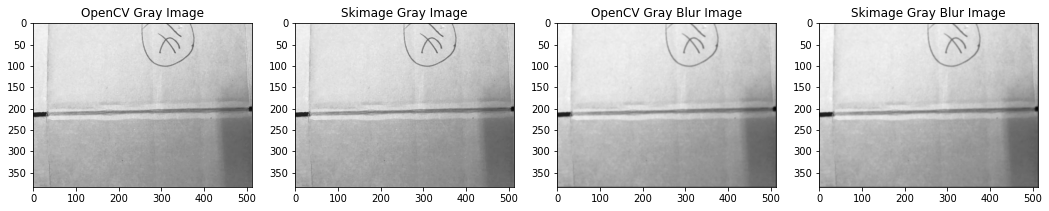

In [ ]:
plt.figure(figsize=(18, 18))
plt.subplot(141),plt.imshow(opencv_gray_img, 'gray'),plt.title('OpenCV Gray Image')
plt.subplot(142),plt.imshow(skimage_gray_img, 'gray'),plt.title('Skimage Gray Image')
plt.subplot(143),plt.imshow(gaussian_using_cv2, 'gray'),plt.title('OpenCV Gray Blur Image')
plt.subplot(144),plt.imshow(gaussian_using_skimage, 'gray'),plt.title('Skimage Gray Blur Image')
plt.show()

#### Gaussian Filter

Referensi :
- https://www.geeksforgeeks.org/opencv-python-program-to-blur-an-image/?ref=gcse
- https://www.geeksforgeeks.org/python-opencv-getgaussiankernel-function/
- https://dsp.stackexchange.com/questions/10057/gaussian-blur-standard-deviation-radius-and-kernel-size
- https://www.youtube.com/watch?v=afpIGjIpjT8

cv2.GaussianBlur(img,(5,5),0)

- https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#gaabe8c836e97159a9193fb0b11ac52cf1

In [ ]:
img_dir = "/content/drive/MyDrive/Skripsi/dataset-resized/cardboard/cardboard1.jpg"
gray_img = cv.imread(img_dir, 0)

gaussian_blur_img = cv.GaussianBlur(gray_img,(5,5),0)

print("Nilai piksel citra gray adalah \n", gray_img)
print("\nNilai piksel citra gray yang sudah diblur adalah \n", gaussian_blur_img)

Nilai piksel citra gray adalah 
 [[208 208 209 ... 180 182 183]
 [209 210 211 ... 181 182 182]
 [211 212 212 ... 182 181 181]
 ...
 [155 156 158 ...  95  95  95]
 [155 155 155 ...  94  95  95]
 [157 155 153 ...  94  95  95]]

Nilai piksel citra gray yang sudah diblur adalah 
 [[209 210 210 ... 181 182 182]
 [210 210 211 ... 181 182 182]
 [211 212 212 ... 182 182 182]
 ...
 [156 156 157 ...  95  95  95]
 [156 155 155 ...  94  95  95]
 [155 155 155 ...  94  95  95]]


In [ ]:
# plt.imshow(gray_img,'gray')

In [ ]:
# plt.imshow(gaussian_blur_img,'gray')

cv2.getGaussianKernel()
- https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#gac05a120c1ae92a6060dd0db190a61afa

In [ ]:
# Syntax: cv.getGaussianKernel(ksize, sigma[, ktype])

# Parameters:

# Ksize: It is the Aperture size. Ksize value should be odd and positive.
# sigma: Sigma is the Gaussian standard deviation.
# It is computed from ksize as sigma = 0.3*((ksize-1)*0.5 – 1) + 0.8 if it is non-positive.
# ktype: It is the type of filter coefficients. It can be CV_32F or CV_64F.

In [ ]:
# read image
img_dir = "/content/drive/MyDrive/Skripsi/dataset-resized/cardboard/cardboard1.jpg"
gray_img = cv.imread(img_dir, 0)

# Creates Gaussian kernel
a = cv2.getGaussianKernel(5, 1.1)

# print Gaussian filter coefficients matrix
print(a)

[[0.07076637]
 [0.2444604 ]
 [0.36954646]
 [0.2444604 ]
 [0.07076637]]


In [ ]:
ksize = input('Masukkan ksize untuk kernel : ')
ksize = int(ksize)
sigma = 0.3*(((ksize-1)*0.5)-1) + 0.8
sigma

Masukkan ksize untuk kernel : 5


1.1

In [ ]:
Gi = α∗e−(i−(ksize−1)/2)2/(2∗sigma2)

Gaussian kernel function

In [ ]:
def gkernel(l=5, sig=1):
    """\
    Gaussian Kernel Creator via given length and sigma
    """

    ax = np.linspace(-(l - 1) / 2., (l - 1) / 2., l)
    xx, yy = np.meshgrid(ax, ax)

    kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sig))

    return kernel / np.sum(kernel)

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Skripsi/dataset-resized/cardboard/cardboard1.jpg') # Reading Image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Converting Image to grayscale
g_kernel = gkernel(5,1) # Create gaussian kernel with 5x5(odd) size and sigma equals to 1
print("Gaussian Filter: ",g_kernel) # show the kernel array
dst = cv2.filter2D(gray,-1,g_kernel) #convolve kernel with image
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # convert BGR(opencv format) to RGB format
# dst = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB) # convert BGR(opencv format) to RGB format

Gaussian Filter:  [[0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]
 [0.01330621 0.0596343  0.09832033 0.0596343  0.01330621]
 [0.02193823 0.09832033 0.16210282 0.09832033 0.02193823]
 [0.01330621 0.0596343  0.09832033 0.0596343  0.01330621]
 [0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]]


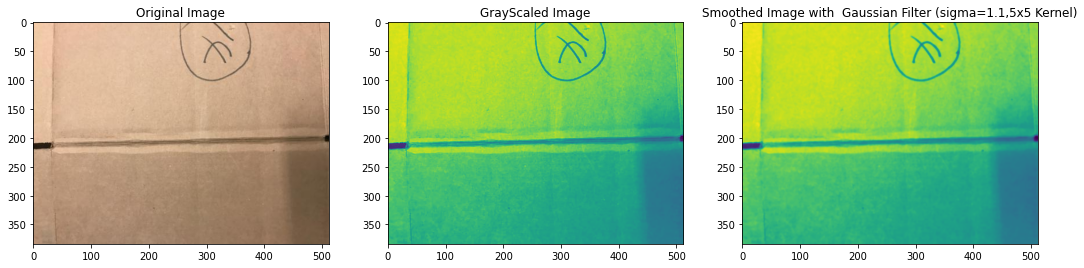

In [ ]:
plt.figure(figsize=(18, 18))
plt.subplot(131),plt.imshow(img),plt.title('Original Image') # visualize and give title
plt.subplot(132),plt.imshow(gray),plt.title('GrayScaled Image')
plt.subplot(133),plt.imshow(dst),plt.title('Smoothed Image with  Gaussian Filter (sigma=1.1,5x5 Kernel)')
plt.show()

#### Resize Citra Asli (512 x 384) ke ukuran (8x8)

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Skripsi/dataset-resized/cardboard/cardboard1.jpg') # Reading Image

# Get original height and width
print(f"Original Dimensions : {img.shape}")

# resize image by specifying custom width and height
resized = cv2.resize(img, (8, 8)) #Rumus resize yang digunakan menggunakan interpolasi linear

print(f"Resized Dimensions : {resized.shape}")
# cv2.imwrite('resized_imaged.jpg', resized)

Original Dimensions : (384, 512, 3)
Resized Dimensions : (8, 8, 3)


In [ ]:
# print(f'rezized : \n{resized}')

In [ ]:
# print(f'rezized[0] : \n{resized[0]}')
# print(f'rezized[1] : \n{resized[1]}')
# print(f'rezized[2] : \n{resized[2]}')
# print(f'rezized[0][0] : \n{resized[0][0]}')

In [ ]:
len(resized)
# resized.ndim

8

In [ ]:
gray_resized = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
gray_resized

array([[211, 199, 202, 197, 203, 190, 181, 178],
       [202, 201, 201, 193, 194, 185, 175, 169],
       [205, 196, 195, 191, 183, 180, 167, 158],
       [188, 194, 192, 185, 181, 170, 160, 135],
       [100, 162, 180, 195, 177, 165, 160, 123],
       [152, 162, 155, 150, 142, 135, 132,  92],
       [156, 155, 146, 140, 136, 128, 129,  90],
       [152, 149, 145, 138, 131, 127, 123,  96]], dtype=uint8)

In [ ]:
gaussian_blur_img = cv.GaussianBlur(gray_resized,(5,5),0)
gaussian_blur_img

array([[202, 201, 199, 196, 192, 186, 179, 176],
       [201, 200, 197, 194, 190, 183, 176, 172],
       [194, 194, 193, 190, 185, 177, 168, 164],
       [179, 182, 185, 184, 178, 169, 158, 153],
       [162, 166, 173, 173, 167, 157, 146, 140],
       [154, 156, 159, 157, 151, 142, 132, 126],
       [153, 152, 150, 145, 139, 132, 122, 117],
       [153, 151, 147, 141, 135, 128, 119, 114]], dtype=uint8)

In [ ]:
gaussian_blur_img = cv.GaussianBlur(gray_resized,(5,5),0,borderType=cv2.BORDER_REFLECT_101)
gaussian_blur_img

array([[202, 201, 199, 196, 192, 186, 179, 176],
       [201, 200, 197, 194, 190, 183, 176, 172],
       [194, 194, 193, 190, 185, 177, 168, 164],
       [179, 182, 185, 184, 178, 169, 158, 153],
       [162, 166, 173, 173, 167, 157, 146, 140],
       [154, 156, 159, 157, 151, 142, 132, 126],
       [153, 152, 150, 145, 139, 132, 122, 117],
       [153, 151, 147, 141, 135, 128, 119, 114]], dtype=uint8)

In [ ]:
gaussian_blur_img = cv.GaussianBlur(gray_resized,(5,5),1)
gaussian_blur_img

array([[202, 201, 199, 196, 193, 186, 179, 176],
       [201, 200, 198, 194, 190, 183, 176, 172],
       [195, 195, 194, 190, 185, 177, 168, 163],
       [179, 182, 186, 185, 178, 169, 158, 152],
       [160, 166, 173, 174, 167, 158, 146, 139],
       [154, 156, 159, 157, 151, 142, 131, 124],
       [153, 153, 149, 144, 139, 131, 122, 115],
       [153, 151, 146, 140, 135, 128, 119, 113]], dtype=uint8)

In [ ]:
gaussian_blur_img = cv.GaussianBlur(gray_resized,(5,5),0,borderType=cv2.BORDER_CONSTANT)
gaussian_blur_img

array([[ 96, 130, 137, 135, 133, 129, 116,  83],
       [130, 176, 185, 182, 178, 172, 154, 110],
       [134, 182, 193, 190, 185, 177, 158, 111],
       [121, 170, 185, 184, 178, 169, 148, 102],
       [108, 156, 173, 173, 167, 157, 136,  92],
       [104, 146, 159, 157, 151, 142, 123,  82],
       [ 98, 134, 140, 136, 130, 124, 107,  71],
       [ 72,  97, 100,  96,  92,  88,  76,  51]], dtype=uint8)

In [ ]:
gaussian_blur_img = cv.GaussianBlur(gray_resized,(5,5),1,borderType=cv2.BORDER_CONSTANT)
gaussian_blur_img

array([[101, 134, 140, 139, 136, 132, 120,  87],
       [134, 179, 187, 184, 180, 173, 157, 113],
       [137, 184, 194, 190, 185, 177, 159, 113],
       [124, 172, 186, 185, 178, 169, 150, 104],
       [109, 156, 173, 174, 167, 158, 138,  94],
       [106, 148, 159, 157, 151, 142, 124,  83],
       [101, 136, 141, 137, 131, 124, 109,  73],
       [ 75, 100, 102,  98,  94,  90,  79,  53]], dtype=uint8)

In [ ]:
gaussian_blur_img = cv.GaussianBlur(gray_resized,(5,5),0,borderType=cv2.BORDER_REPLICATE)
gaussian_blur_img

array([[206, 202, 200, 198, 194, 188, 181, 176],
       [203, 200, 198, 195, 190, 183, 176, 170],
       [194, 194, 193, 190, 185, 177, 167, 159],
       [174, 181, 185, 184, 178, 169, 157, 145],
       [154, 165, 173, 173, 167, 157, 144, 129],
       [148, 155, 159, 157, 151, 142, 129, 114],
       [152, 152, 149, 145, 139, 131, 120, 106],
       [152, 150, 145, 139, 134, 127, 117, 104]], dtype=uint8)

In [ ]:
gaussian_blur_img = cv.GaussianBlur(gray_resized,(5,5),1,borderType=cv2.BORDER_REPLICATE)
gaussian_blur_img

array([[206, 202, 200, 198, 195, 188, 181, 176],
       [203, 200, 198, 195, 190, 184, 176, 170],
       [195, 195, 194, 190, 185, 177, 167, 159],
       [174, 182, 186, 185, 178, 169, 157, 145],
       [151, 164, 173, 174, 167, 158, 144, 129],
       [148, 155, 159, 157, 151, 142, 129, 113],
       [152, 152, 149, 144, 138, 131, 120, 105],
       [152, 150, 145, 139, 133, 127, 117, 104]], dtype=uint8)

In [ ]:
get_kernel = cv.getGaussianKernel(5,1)
get_kernel

array([[0.05448868],
       [0.24420134],
       [0.40261995],
       [0.24420134],
       [0.05448868]])

In [ ]:
img_testing = np.array([[0,0,0,0,0],
               [0,0,0,0,0],
               [0,0,1,0,0],
               [0,0,0,0,0],
               [0,0,0,0,0]],dtype='uint8')
img_testing

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]], dtype=uint8)

In [ ]:
gaussian_blur_img = cv.GaussianBlur(img_testing,(5,5),1)
gaussian_blur_img

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]], dtype=uint8)

In [ ]:
img=np.zeros((7,7))
img[3,3]=1
img

array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]])

Cara mengetahui kernel yang digunakan pada funsgi GaussianBlur()

https://stackoverflow.com/questions/61394826/how-do-i-get-to-show-gaussian-kernel-for-2d-opencv

https://learnopencv.com/image-filtering-using-convolution-in-opencv/

In [ ]:
img=np.zeros((7,7))
img[3,3]=1
img

img1 = cv2.GaussianBlur(img, (5, 5), 0)
img1

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.00390625, 0.015625  , 0.0234375 , 0.015625  ,
        0.00390625, 0.        ],
       [0.        , 0.015625  , 0.0625    , 0.09375   , 0.0625    ,
        0.015625  , 0.        ],
       [0.        , 0.0234375 , 0.09375   , 0.140625  , 0.09375   ,
        0.0234375 , 0.        ],
       [0.        , 0.015625  , 0.0625    , 0.09375   , 0.0625    ,
        0.015625  , 0.        ],
       [0.        , 0.00390625, 0.015625  , 0.0234375 , 0.015625  ,
        0.00390625, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ]])

In [ ]:
img3 = cv2.GaussianBlur(src=img, ksize=(5,5), sigmaX=0, sigmaY=0)
img3

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.00390625, 0.015625  , 0.0234375 , 0.015625  ,
        0.00390625, 0.        ],
       [0.        , 0.015625  , 0.0625    , 0.09375   , 0.0625    ,
        0.015625  , 0.        ],
       [0.        , 0.0234375 , 0.09375   , 0.140625  , 0.09375   ,
        0.0234375 , 0.        ],
       [0.        , 0.015625  , 0.0625    , 0.09375   , 0.0625    ,
        0.015625  , 0.        ],
       [0.        , 0.00390625, 0.015625  , 0.0234375 , 0.015625  ,
        0.00390625, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ]])

In [ ]:
img2 = cv2.GaussianBlur(img, (5, 5), 1)
img2

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.00296902, 0.01330621, 0.02193823, 0.01330621,
        0.00296902, 0.        ],
       [0.        , 0.01330621, 0.0596343 , 0.09832033, 0.0596343 ,
        0.01330621, 0.        ],
       [0.        , 0.02193823, 0.09832033, 0.16210282, 0.09832033,
        0.02193823, 0.        ],
       [0.        , 0.01330621, 0.0596343 , 0.09832033, 0.0596343 ,
        0.01330621, 0.        ],
       [0.        , 0.00296902, 0.01330621, 0.02193823, 0.01330621,
        0.00296902, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ]])

In [ ]:
img4 = cv2.GaussianBlur(src=img, ksize=(5,5), sigmaX=1, sigmaY=0)
img4

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.00296902, 0.01330621, 0.02193823, 0.01330621,
        0.00296902, 0.        ],
       [0.        , 0.01330621, 0.0596343 , 0.09832033, 0.0596343 ,
        0.01330621, 0.        ],
       [0.        , 0.02193823, 0.09832033, 0.16210282, 0.09832033,
        0.02193823, 0.        ],
       [0.        , 0.01330621, 0.0596343 , 0.09832033, 0.0596343 ,
        0.01330621, 0.        ],
       [0.        , 0.00296902, 0.01330621, 0.02193823, 0.01330621,
        0.00296902, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ]])

In [ ]:
img_testing = np.array([[0.00296902, 0.01330621, 0.02193823, 0.01330621, 0.00296902],
               [0.01330621, 0.0596343 , 0.09832033, 0.0596343, 0.01330621],
               [0.02193823, 0.09832033, 0.16210282, 0.09832033, 0.02193823],
               [0.01330621, 0.0596343 , 0.09832033, 0.0596343, 0.01330621],
               [0.00296902, 0.01330621, 0.02193823, 0.01330621, 0.00296902]],dtype='float')

In [ ]:
np.sum(img_testing)

1.00000002

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (1, 41))
scaled = scaler.fit_transform(img_testing)
scaled

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [22.79782922, 22.79783311, 22.79783068, 22.79783311, 22.79782922],
       [41.        , 41.        , 41.        , 41.        , 41.        ],
       [22.79782922, 22.79783311, 22.79783068, 22.79783311, 22.79782922],
       [ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ]])

In [ ]:
np.sum(img1)

1.0

In [ ]:
gray_resized

array([[211, 199, 202, 197, 203, 190, 181, 178],
       [202, 201, 201, 193, 194, 185, 175, 169],
       [205, 196, 195, 191, 183, 180, 167, 158],
       [188, 194, 192, 185, 181, 170, 160, 135],
       [100, 162, 180, 195, 177, 165, 160, 123],
       [152, 162, 155, 150, 142, 135, 132,  92],
       [156, 155, 146, 140, 136, 128, 129,  90],
       [152, 149, 145, 138, 131, 127, 123,  96]], dtype=uint8)

In [ ]:
# Apply identity kernel
kernel1 = np.array([[1,4,7,4,1],
                    [4,16,26,16,4],
                    [7,26,41,26,7],
                    [4,16,26,16,4],
                    [1,4,7,4,1]])

identity = cv2.filter2D(src=gray_resized, ddepth=-1, kernel=kernel1)
identity

array([[255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255]], dtype=uint8)

In [ ]:
g_kernel = gkernel(5,1) # Create gaussian kernel with 5x5(odd) size and sigma equals to 1
print(f"Gaussian Filter (5x5): \n{g_kernel}") # show the kernel array
dst = cv2.filter2D(gray_resized,-1,g_kernel) #convolve kernel with image
print(f"Matriks Piksel 8x8 yang sudah dilakukan Gaussian Blur (5x5)\n{dst}")

Gaussian Filter (5x5): 
[[0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]
 [0.01330621 0.0596343  0.09832033 0.0596343  0.01330621]
 [0.02193823 0.09832033 0.16210282 0.09832033 0.02193823]
 [0.01330621 0.0596343  0.09832033 0.0596343  0.01330621]
 [0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]]
Matriks Piksel 8x8 yang sudah dilakukan Gaussian Blur (5x5)
[[202 201 199 196 193 186 179 176]
 [201 200 198 194 190 183 176 172]
 [195 195 194 190 185 177 168 163]
 [179 182 186 185 178 169 158 152]
 [160 166 173 174 167 158 146 139]
 [154 156 159 157 151 142 131 124]
 [153 152 149 144 139 131 122 116]
 [153 151 146 141 135 128 119 113]]


In [ ]:
gaussian_blur_img = cv.GaussianBlur(gray_resized,(5,5),1)
gaussian_blur_img

array([[202, 201, 199, 196, 193, 186, 179, 176],
       [201, 200, 198, 194, 190, 183, 176, 172],
       [195, 195, 194, 190, 185, 177, 168, 163],
       [179, 182, 186, 185, 178, 169, 158, 152],
       [160, 166, 173, 174, 167, 158, 146, 139],
       [154, 156, 159, 157, 151, 142, 131, 124],
       [153, 153, 149, 144, 139, 131, 122, 115],
       [153, 151, 146, 140, 135, 128, 119, 113]], dtype=uint8)

## Segmentasi Citra

Pembentukan Citra Biner menggunakan 3 metode :


1.   Adaptive Mean Thresholding
2.   Adaptive Gaussian Thresholding
3.   Otsu Thresholding

Referensi Segmentasi Thresholding :
*   https://pyimagesearch.com/2021/05/12/adaptive-thresholding-with-opencv-cv2-adaptivethreshold/

Referensi Gaussian Filter/Gaussian Blur :
*   https://medium.com/analytics-vidhya/opencv-smoothing-image-filters-a758f0f13be9
*   https://github.com/TheAlgorithms/Python/blob/master/digital_image_processing/filters/gaussian_filter.py
*   https://programmer.group/implementation-of-gaussian-filter-handwriting-filter-function-in-python-opencv.html
*   https://www.kaggle.com/code/dasmehdixtr/gaussian-filter-implementation-from-scratch
*   https://homepages.inf.ed.ac.uk/rbf/HIPR2/gsmooth.htm

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img_dir = "/content/drive/MyDrive/Skripsi/dataset-resized/plastic"
data_path = os.path.join(img_dir,'*g')
files = glob.glob(data_path)
data = []
i = 0

for f1 in files:
    # Read gray image
    gray_img = cv.imread(f1, 0)
    # Get images file name
    img_name_file = os.path.basename(f1)

    # Blur image with Gaussian Blur
    # From there we preprocess the image by converting it to grayscale
    # and blurring it with a 5×5 kernel. Applying Gaussian blurring helps remove some of
    # the high frequency edges in the image that we are not concerned with
    # and allow us to obtain a more “clean” segmentation.
    blur_img = cv.GaussianBlur(gray_img,(5,5),0) # nilai sigma 0, kernel akan dihitung berdasarkan ksize kernel
    # blur_img = gray_img # tanpa di denoising terlebih dulu
    # blur_img

    # Adaptive Mean Thresholding
    adaptive_mean_img = cv.adaptiveThreshold(blur_img,255,cv.ADAPTIVE_THRESH_MEAN_C, \
                                             cv.THRESH_BINARY_INV,21,2)
    # Adaptive Gaussian Thresholding
    adaptive_gaussian_img = cv.adaptiveThreshold(blur_img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, \
                                cv.THRESH_BINARY_INV,21,2)
    # Otsu Binarization
    ret1,otsu_img = cv.threshold(blur_img,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    # Save Binary Images
    adaptive_mean_img_path = '/content/drive/MyDrive/Skripsi/Hasil Segmentasi/Adaptive Mean Thresholding/plastic'
    adaptive_gaussian_img_path = '/content/drive/MyDrive/Skripsi/Hasil Segmentasi/Adaptive Gaussian Thresholding/plastic'
    otsu_img_path = '/content/drive/MyDrive/Skripsi/Hasil Segmentasi/Otsu Binarization/plastic'

    # adaptive_mean_img_path = '/content/drive/MyDrive/Skripsi/Hasil Segmentasi/tanpa blur/Adaptive Mean Thresholding/plastic'
    # adaptive_gaussian_img_path = '/content/drive/MyDrive/Skripsi/Hasil Segmentasi/tanpa blur/Adaptive Gaussian Thresholding/plastic'
    # otsu_img_path = '/content/drive/MyDrive/Skripsi/Hasil Segmentasi/tanpa blur/Otsu Binarization/plastic'

    adaptive_mean_img = cv.cvtColor(adaptive_mean_img, cv.COLOR_BGR2RGB)
    adaptive_gaussian_img = cv.cvtColor(adaptive_gaussian_img, cv.COLOR_BGR2RGB)
    otsu_img = cv.cvtColor(otsu_img, cv.COLOR_BGR2RGB)

    cv.imwrite(os.path.join(adaptive_mean_img_path , img_name_file), adaptive_mean_img)
    cv.imwrite(os.path.join(adaptive_gaussian_img_path , img_name_file), adaptive_gaussian_img)
    cv.imwrite(os.path.join(otsu_img_path , img_name_file), otsu_img)

    # Cek Banyak Gambar/Berapa Kali Iterasi
    i = i + 1
    # break

print(i)

482


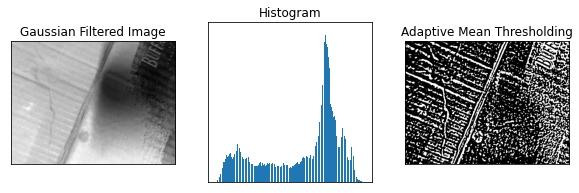

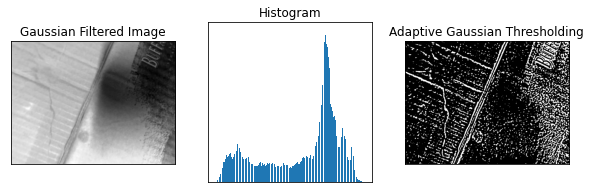

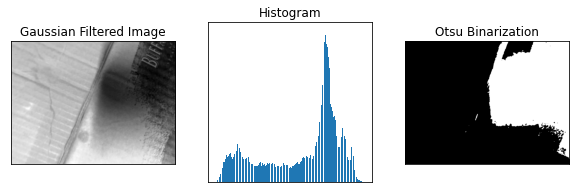

In [ ]:
# plot all the images and their histograms
images = [gaussian_blur_img, 0, adaptive_mean_img,
          gaussian_blur_img, 0, adaptive_gaussian_img,
          gaussian_blur_img, 0, otsu_img]

titles = ['Gaussian Filtered Image', 'Histogram', 'Adaptive Mean Thresholding',
          'Gaussian Filtered Image', 'Histogram', 'Adaptive Gaussian Thresholding',
          'Gaussian Filtered Image', 'Histogram', 'Otsu Binarization']

for i in range(3):
    figure_size = 10
    plt.figure(figsize=(figure_size,figure_size))

    # Blur Image
    plt.subplot(3,3,i*3+1), plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]),plt.yticks([])

    # Histogram
    plt.subplot(3,3,i*3+2), plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])

    #
    plt.subplot(3,3,i*3+3), plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]),plt.yticks([])
plt.show()

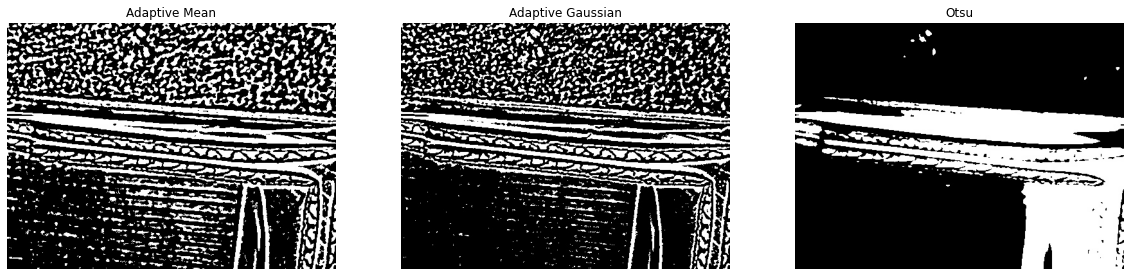

In [ ]:
sg1 = cv2.imread("/content/drive/MyDrive/Skripsi/Hasil Segmentasi/Adaptive Mean Thresholding/cardboard/cardboard120.jpg",1)
sg1 = cv2.cvtColor(sg1, cv2.COLOR_BGR2RGB)
sg2 = cv2.imread("/content/drive/MyDrive/Skripsi/Hasil Segmentasi/Adaptive Gaussian Thresholding/cardboard/cardboard120.jpg",1)
sg2 = cv2.cvtColor(sg2, cv2.COLOR_BGR2RGB)
sg3 = cv2.imread("/content/drive/MyDrive/Skripsi/Hasil Segmentasi/Otsu Binarization/cardboard/cardboard120.jpg",1)
sg3 = cv2.cvtColor(sg3, cv2.COLOR_BGR2RGB)

figure_size = 20
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,3,1),plt.imshow(sg1),plt.axis("off")
plt.title('Adaptive Mean'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(sg2),plt.axis("off")
plt.title('Adaptive Gaussian'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(sg3),plt.axis("off")
plt.title('Otsu'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
print(len(os.listdir("/content/drive/MyDrive/Skripsi/Hasil Segmentasi/Adaptive Mean Thresholding/after_augmentation/plastic")))
print(len(os.listdir("/content/drive/MyDrive/Skripsi/Hasil Segmentasi/Adaptive Gaussian Thresholding/after_augmentation/plastic")))
print(len(os.listdir("/content/drive/MyDrive/Skripsi/Hasil Segmentasi/Otsu Binarization/after_augmentation/plastic")))

2410
2410
2410




---


# Ekstrasi Fitur


## Hu Moment

In [ ]:
classes = {
  "cardboard" : 1,
  "glass"     : 2,
  "metal"     : 3,
  "paper"     : 4,
  "plastic"   : 5
}

classes

{'cardboard': 1, 'glass': 2, 'metal': 3, 'paper': 4, 'plastic': 5}

In [ ]:
import cv2 as cv
import numpy as np
import pandas as pd

def feature_extraction(data_file, dataset):
	dump = []

	print("Extracting Hu moments...")

	for c, idx in classes.items():
			class_folder = dataset + "{}/".format(c)

			for f in os.listdir(class_folder):
							fpath = class_folder + f
							nama_file = f.replace(".*", "")
							# nama = os.path.basename(fpath)

							img = cv.imread(fpath, cv.IMREAD_GRAYSCALE)
							# Membalik pixel citra, hitam -> putih dan sebaliknya
							img = cv.bitwise_not(img) #bisa dinonaktifkan, karena mempengaruhi nilai hu moment
							hu = cv.HuMoments(cv.moments(img))

							for i in range(0, 7):
								hu[i] = -1 * np.sign(hu[i]) * np.log10(np.abs(hu[i]))

							hu = hu.reshape((1, 7)).tolist()[0] + [nama_file, idx]
							dump.append(hu)

			print(c, "ok!")

	cols = ["Hu1", "Hu2", "Hu3", "Hu4", "Hu5", "Hu6", "Hu7", "Nama File", "Kelas"]

	df = pd.DataFrame(dump, columns=cols)
	path = "/content/drive/MyDrive/Skripsi/Ekstraksi Fitur/tanpa augmentation/"
	path = os.path.join(path, data_file)

	df.to_csv(path, index=None)

	print("Extraction done!")

In [ ]:
# data_file = "AdaptiveGaussianThres_5Class.csv"
data_file = "AdaptiveMeanThres_5Class.csv"
# data_file = "OtsuThres_5Class.csv"

# dataset = "/content/drive/MyDrive/Skripsi/Hasil Segmentasi/Adaptive Gaussian Thresholding/"
dataset = "/content/drive/MyDrive/Skripsi/Hasil Segmentasi/Adaptive Mean Thresholding/"
# dataset = "/content/drive/MyDrive/Skripsi/Hasil Segmentasi/Otsu Binarization/"

feature_extraction(data_file, dataset)

Extracting Hu moments...
cardboard ok!
glass ok!
metal ok!
paper ok!
plastic ok!
Extraction done!


## Color Moment

Sumber :

*   https://developpaper.com/image-color-feature-extraction-color-histogram-color-moment-python/
*   https://www.kaggle.com/code/vievie31/planet-lbp-color-sobel-feature-extraction
*   https://github.com/giovannitjahyamulia/svm-glcm-colormoments-python
*   https://github.com/AkhmadMuzanni/KEMU
*   https://docs.opencv.org/3.4/de/d25/imgproc_color_conversions.html#color_convert_rgb_hsv
- https://pyimagesearch.com/2021/04/28/opencv-color-spaces-cv2-cvtcolor/



### 1 Citra

In [ ]:
# import the necessary packages
import numpy as np
import cv2

def color_moments(filename):
    img = cv2.imread(filename)
    nama = os.path.basename(filename)
    if img is None:
        return
    # Convert BGR to HSV colorspace
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    # Split the channels - h,s,v
    h, s, v = cv2.split(hsv)
    # Initialize the color feature
    color_feature = []
    # N = h.shape[0] * h.shape[1]
    # The first central moment - average
    h_mean = np.mean(h)  # np.sum(h)/float(N)
    s_mean = np.mean(s)  # np.sum(s)/float(N)
    v_mean = np.mean(v)  # np.sum(v)/float(N)
    color_feature.extend([h_mean, s_mean, v_mean])
    # The second central moment - standard deviation
    h_std = np.std(h)  # np.sqrt(np.mean(abs(h - h.mean())**2))
    s_std = np.std(s)  # np.sqrt(np.mean(abs(s - s.mean())**2))
    v_std = np.std(v)  # np.sqrt(np.mean(abs(v - v.mean())**2))
    color_feature.extend([h_std, s_std, v_std])
    # The third central moment - the third root of the skewness
    h_skewness = np.mean(abs(h - h.mean())**3)
    s_skewness = np.mean(abs(s - s.mean())**3)
    v_skewness = np.mean(abs(v - v.mean())**3)
    h_thirdMoment = h_skewness**(1./3)
    s_thirdMoment = s_skewness**(1./3)
    v_thirdMoment = v_skewness**(1./3)
    color_feature.extend([h_thirdMoment, s_thirdMoment, v_thirdMoment, nama])

    cols = ["meanH", "meanS", "meanV", "stdH", "stdS", "stdV", "skewH", "skewS", "skewV", "Nama File"]

    # df = pd.DataFrame([color_feature], columns=cols)
    # path = "/content/drive/MyDrive/Skripsi/Ekstraksi Fitur/Color Moment/"
    # data_file = "ColorMoment_5Class.csv"
    # path = os.path.join(path, data_file)

    # df.to_csv(path, index=None)
    print("Extraction done!")
    return color_feature


In [ ]:
color_moments("/content/drive/MyDrive/Skripsi/dataset-resized/cardboard/cardboard1.jpg")

Extraction done!


[13.874496459960938,
 85.77412923177083,
 189.0046641031901,
 0.9753382955670522,
 10.469748264293376,
 34.50329225637778,
 1.2946550595011266,
 14.685489976243185,
 40.02790320966536,
 'cardboard1.jpg']

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Skripsi/dataset-resized/cardboard/cardboard1.jpg')
resized = cv2.resize(img, (256, 256))
hsv = cv2.cvtColor(resized, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)
h_mean = np.mean(h)  # np.sum(h)/float(N)
s_mean = np.mean(s)  # np.sum(s)/float(N)
v_mean = np.mean(v)  # np.sum(v)/float(N)
print(f"{h_mean}")
print(f"{s_mean}")
print(f"{v_mean}")

13.876495361328125
85.74795532226562
188.9852752685547


### Banyak Citra

In [ ]:
classes = {
  "cardboard" : 1,
  "glass"     : 2,
  "metal"     : 3,
  "paper"     : 4,
  "plastic"   : 5
}

classes

{'cardboard': 1, 'glass': 2, 'metal': 3, 'paper': 4, 'plastic': 5}

In [ ]:
import cv2 as cv
import numpy as np
import pandas as pd

def feature_extraction(data_file, dataset):
	dump = []

	print("Extracting Color moments...")

	for c, idx in classes.items():
			class_folder = dataset + "{}/".format(c)

			for f in os.listdir(class_folder):
							fpath = class_folder + f
							nama_file = f.replace(".*", "")
							# nama = os.path.basename(fpath)

							img = cv2.imread(fpath)
							# Convert BGR to HSV colorspace
							hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
							# Split the channels - h,s,v
							h, s, v = cv2.split(hsv)
							# Initialize the color feature
							color_feature = []
							# N = h.shape[0] * h.shape[1]
							# The first central moment - average
							h_mean = np.mean(h)  # np.sum(h)/float(N)
							s_mean = np.mean(s)  # np.sum(s)/float(N)
							v_mean = np.mean(v)  # np.sum(v)/float(N)
							color_feature.extend([h_mean, s_mean, v_mean])
							# The second central moment - standard deviation
							h_std = np.std(h)  # np.sqrt(np.mean(abs(h - h.mean())**2))
							s_std = np.std(s)  # np.sqrt(np.mean(abs(s - s.mean())**2))
							v_std = np.std(v)  # np.sqrt(np.mean(abs(v - v.mean())**2))
							color_feature.extend([h_std, s_std, v_std])

							# The third central moment - the third root of the skewness
							h_skewness = np.mean(abs(h - h.mean())**3)
							s_skewness = np.mean(abs(s - s.mean())**3)
							v_skewness = np.mean(abs(v - v.mean())**3)
							h_thirdMoment = h_skewness**(1./3)
							s_thirdMoment = s_skewness**(1./3)
							v_thirdMoment = v_skewness**(1./3)
							color_feature.extend([h_thirdMoment, s_thirdMoment, v_thirdMoment, nama_file, idx])
							dump.append(color_feature)

			print(c, "ok!")

	cols = ["meanH", "meanS", "meanV", "stdH", "stdS", "stdV", "skewH", "skewS", "skewV", "Nama File", "Kelas"]

	df = pd.DataFrame(dump, columns=cols)
	path = path = "/content/drive/MyDrive/Skripsi/Ekstraksi Fitur/Color Moment/"
	path = os.path.join(path, data_file)

	df.to_csv(path, index=None)

	print("Extraction done!")

In [ ]:
data_file = "ColorMoment_5Class.csv"

dataset = "/content/drive/MyDrive/Skripsi/dataset-resized/"

feature_extraction(data_file, dataset)

Extracting Color moments...
cardboard ok!
glass ok!
metal ok!
paper ok!
plastic ok!
Extraction done!


## Hu Moment + Color Moment

Concatenate nilai fitur dalam file csv Hu Moment & Color Moment

Skenario penggabungan :

*   Color Moment + Hu Moment (dari citra biner hasil Adaptive Mean Thresholding)

code reference :

*   https://kotakode.com/pertanyaan/807/Bagaimana-cara-menggabungkan-2-dataset-dengan-format-.csv-dan-bisa-di-unduh.
*   https://www.pengembangan-web-mp-pd.com/id/python/python-python-menggabungkan-beberapa-file-csv/836892304/




In [ ]:
color1 = "/content/drive/MyDrive/Skripsi/Ekstraksi Fitur/Color Moment/ColorMoment_5Class.csv"

hu1 = "/content/drive/MyDrive/Skripsi/Ekstraksi Fitur/tanpa augmentation/AdaptiveGaussianThres_5Class.csv"
hu2 = "/content/drive/MyDrive/Skripsi/Ekstraksi Fitur/tanpa augmentation/AdaptiveMeanThres_5Class.csv"
hu3 = "/content/drive/MyDrive/Skripsi/Ekstraksi Fitur/tanpa augmentation/OtsuThres_5Class.csv"

import pandas as pd

# result.to_csv('SimpanFile.csv', index = False) # Simpan dataframe menjadi file SimpanFile.csv

ColorMoment = pd.read_csv(color1)
HuMoment = pd.read_csv(hu3).drop(['Nama File', 'Kelas'], axis=1)

frames = [HuMoment, ColorMoment]
result = pd.concat(frames, axis=1)  #axis=1 utk join kolom

path = "/content/drive/MyDrive/Skripsi/Ekstraksi Fitur/Hu + Color Moment/"
data_file = "Hu(Otsu)&ColorMoment_5Class.csv"

path = os.path.join(path, data_file)
result.to_csv(path, index=None)

result

,Hu1,Hu2,Hu3,Hu4,Hu5,Hu6,Hu7,meanH,meanS,meanV,stdH,stdS,stdV,skewH,skewS,skewV,Nama File,Kelas
0,2.943193,6.225992,9.678991,10.346655,21.012902,13.734476,-20.370465,13.874496,85.774129,189.004664,0.975338,10.469748,34.503292,1.294655,14.685490,40.027903,cardboard1.jpg,1
1,3.065105,6.848082,9.890342,11.326040,-22.037549,-14.984824,-22.145133,16.738032,60.765549,186.168747,16.698673,15.049106,41.148602,31.875396,18.480281,54.838001,cardboard10.jpg,1
2,2.596566,5.671922,9.255627,9.326112,18.761660,-13.119318,18.773494,38.806753,24.308985,187.876694,40.511856,45.566601,37.164346,51.453111,60.796599,44.779825,cardboard100.jpg,1
3,3.147344,7.339382,10.544086,12.050876,-24.099367,-15.782035,-23.355301,16.333288,103.312948,148.703237,2.053065,60.639688,62.842384,2.486562,62.986500,66.486885,cardboard101.jpg,1
4,2.723624,6.337061,9.122112,9.066721,18.265112,12.473797,-18.370968,30.955012,39.384954,173.667435,30.856430,38.058877,39.142017,38.857629,40.186078,42.849296,cardboard102.jpg,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2385,3.050122,7.155058,10.156189,10.902986,21.573494,15.228501,21.593128,46.405375,29.574234,174.566162,38.318357,30.629493,32.218107,41.633355,51.267794,39.307113,plastic96.jpg,5
2386,3.143714,7.045371,10.583454,11.952406,-23.227825,-15.476588,23.955223,23.467972,83.858892,130.389542,8.378999,61.440617,85.933313,12.536109,70.597542,91.531496,plastic95.jpg,5
2387,3.049965,6.643618,10.774616,14.229202,-26.834503,18.333602,-26.941894,26.684107,19.456248,172.215068,31.449758,32.159472,31.977331,51.689526,52.025051,35.255842,plastic97.jpg,5
2388,2.999322,6.716665,9.393075,10.883226,21.163913,15.756824,-21.180176,27.420888,76.165385,186.336019,35.372883,54.103764,40.477887,54.559060,66.825605,45.483353,plastic98.jpg,5


In [ ]:
HuMoment = pd.read_csv(hu2)
HuMoment

,Hu1,Hu2,Hu3,Hu4,Hu5,Hu6,Hu7,Nama File,Kelas
0,2.517659,5.862698,10.481850,11.031401,-21.789747,-14.166610,-22.839493,cardboard1.jpg,1
1,2.627297,6.474835,10.237757,10.357361,20.726640,13.795593,20.930351,cardboard10.jpg,1
2,2.363082,5.639875,8.201446,9.602367,18.505325,12.489457,19.662425,cardboard100.jpg,1
3,2.467478,6.245169,8.883821,8.889658,17.776458,12.029887,19.553480,cardboard101.jpg,1
4,2.563102,6.191423,9.863585,9.828799,19.719727,12.927006,20.040025,cardboard102.jpg,1
...,...,...,...,...,...,...,...,...,...
2385,2.717037,6.143017,10.870418,9.404450,19.554404,12.487703,20.167690,plastic96.jpg,5
2386,2.579009,5.687186,8.979605,9.700240,-19.401992,-14.029121,-19.085638,plastic95.jpg,5
2387,2.387834,6.048637,9.111253,9.354089,-18.586762,-12.474413,21.137106,plastic97.jpg,5
2388,2.651608,7.431459,10.330725,10.058484,21.197510,-13.777788,-20.255912,plastic98.jpg,5


In [ ]:
ColorMoment = pd.read_csv(color1)
ColorMoment

,meanH,meanS,meanV,stdH,stdS,stdV,skewH,skewS,skewV,Nama File,Kelas
0,13.874496,85.774129,189.004664,0.975338,10.469748,34.503292,1.294655,14.685490,40.027903,cardboard1.jpg,1
1,16.738032,60.765549,186.168747,16.698673,15.049106,41.148602,31.875396,18.480281,54.838001,cardboard10.jpg,1
2,38.806753,24.308985,187.876694,40.511856,45.566601,37.164346,51.453111,60.796599,44.779825,cardboard100.jpg,1
3,16.333288,103.312948,148.703237,2.053065,60.639688,62.842384,2.486562,62.986500,66.486885,cardboard101.jpg,1
4,30.955012,39.384954,173.667435,30.856430,38.058877,39.142017,38.857629,40.186078,42.849296,cardboard102.jpg,1
...,...,...,...,...,...,...,...,...,...,...,...
2385,46.405375,29.574234,174.566162,38.318357,30.629493,32.218107,41.633355,51.267794,39.307113,plastic96.jpg,5
2386,23.467972,83.858892,130.389542,8.378999,61.440617,85.933313,12.536109,70.597542,91.531496,plastic95.jpg,5
2387,26.684107,19.456248,172.215068,31.449758,32.159472,31.977331,51.689526,52.025051,35.255842,plastic97.jpg,5
2388,27.420888,76.165385,186.336019,35.372883,54.103764,40.477887,54.559060,66.825605,45.483353,plastic98.jpg,5


# Klasifikasi

Classifier : SVM

Referensi SVM :
- https://statquest.org/video-index/
- https://scikit-learn.org/stable/modules/svm.html
- https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html
- https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html#sphx-glr-auto-examples-svm-plot-rbf-parameters-py
- https://www.hackerearth.com/blog/developers/simple-tutorial-svm-parameter-tuning-python-r/
- https://stats.stackexchange.com/questions/348318/degree-parameter-for-svm-polynomial-kernel

In [ ]:
import joblib
from sklearn.svm import SVC as SVM
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split as data_split
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
# import dataset
# df = pd.read_csv("/content/drive/MyDrive/Skripsi/Ekstraksi Fitur/tanpa augmentation/AdaptiveMeanThres_5Class.csv")
df = pd.read_csv("/content/drive/MyDrive/Skripsi/Ekstraksi Fitur/Color Moment/ColorMoment_5Class.csv")
# df = pd.read_csv("/content/drive/MyDrive/Skripsi/Ekstraksi Fitur/Hu + Color Moment/Hu(Mean)&ColorMoment_5Class.csv")

In [ ]:
df

,meanH,meanS,meanV,stdH,stdS,stdV,skewH,skewS,skewV,Nama File,Kelas
0,13.874496,85.774129,189.004664,0.975338,10.469748,34.503292,1.294655,14.685490,40.027903,cardboard1.jpg,1
1,16.738032,60.765549,186.168747,16.698673,15.049106,41.148602,31.875396,18.480281,54.838001,cardboard10.jpg,1
2,38.806753,24.308985,187.876694,40.511856,45.566601,37.164346,51.453111,60.796599,44.779825,cardboard100.jpg,1
3,16.333288,103.312948,148.703237,2.053065,60.639688,62.842384,2.486562,62.986500,66.486885,cardboard101.jpg,1
4,30.955012,39.384954,173.667435,30.856430,38.058877,39.142017,38.857629,40.186078,42.849296,cardboard102.jpg,1
...,...,...,...,...,...,...,...,...,...,...,...
2385,46.405375,29.574234,174.566162,38.318357,30.629493,32.218107,41.633355,51.267794,39.307113,plastic96.jpg,5
2386,23.467972,83.858892,130.389542,8.378999,61.440617,85.933313,12.536109,70.597542,91.531496,plastic95.jpg,5
2387,26.684107,19.456248,172.215068,31.449758,32.159472,31.977331,51.689526,52.025051,35.255842,plastic97.jpg,5
2388,27.420888,76.165385,186.336019,35.372883,54.103764,40.477887,54.559060,66.825605,45.483353,plastic98.jpg,5


In [ ]:
len(df)

2390

In [ ]:
# df.iloc[index row, index column]
df.iloc[259,:] # ":" sebagai step

meanH               16.771637
meanS               88.966604
meanV              184.147003
stdH                 3.226272
stdS                 16.97344
stdV                46.610136
skewH                9.180959
skewS               27.363165
skewV               56.523426
Nama File    cardboard332.jpg
Kelas                       1
Name: 259, dtype: object

In [ ]:
X = df.drop(["Nama File", "Kelas"], axis=1)
# X = df.drop(["Kelas"], axis=1) # Untuk Cek Nama File pada Normalisasi
y = df["Kelas"]
# y = df.iloc[:,-1:].values.ravel()

X_train, X_test, y_train, y_test = data_split(X, y, test_size=0.1, random_state=42)

In [ ]:
X_train

,meanH,meanS,meanV,stdH,stdS,stdV,skewH,skewS,skewV
259,16.771637,88.966604,184.147003,3.226272,16.973440,46.610136,9.180959,27.363165,56.523426
402,18.020147,75.323064,171.842005,6.569589,17.236139,60.114902,10.792717,21.590670,67.237664
2304,21.529719,22.988480,196.497620,14.558959,9.918123,21.337911,27.867836,13.620382,27.578539
1932,17.113251,21.427088,171.723363,3.976025,5.936691,8.408057,7.352633,6.687350,10.872819
986,16.537059,31.400625,145.501506,12.030908,14.795481,29.901953,25.482360,19.517366,36.653123
...,...,...,...,...,...,...,...,...,...
1638,34.286341,20.682917,165.135473,32.294929,27.498314,49.740649,40.922671,34.699045,58.401514
1095,21.805394,12.806391,191.624639,14.852719,9.348188,35.498139,25.787525,18.644575,46.069667
1130,16.214406,43.882055,202.488063,2.700576,30.722928,30.457516,5.951304,43.425935,38.725464
1294,121.833552,69.241948,182.057353,44.937427,87.555368,45.909234,56.368064,98.369586,53.046250


In [ ]:
X_test

,meanH,meanS,meanV,stdH,stdS,stdV,skewH,skewS,skewV
1321,38.105988,31.778249,185.563446,36.683601,56.210809,53.468076,45.911764,75.080187,63.864103
1413,14.083755,30.724121,197.002106,7.624568,17.236065,39.889005,16.435709,23.873835,46.001487
530,14.493896,29.204600,152.825099,4.598349,8.999668,11.427257,9.232303,10.324378,14.419225
554,11.855265,58.499237,167.626246,5.098269,9.630014,18.612239,11.618598,12.948108,24.116831
229,14.787404,77.667684,188.211858,0.973276,24.916938,37.183282,1.162433,28.631673,41.945773
...,...,...,...,...,...,...,...,...,...
1261,26.962896,26.125763,96.831207,25.795201,22.309243,51.961786,40.166108,34.911734,59.818758
1270,21.129420,35.899653,173.883108,15.958807,18.041539,74.909341,27.415747,31.096465,81.147460
834,18.455190,48.604975,174.752833,2.114884,15.493155,32.069340,4.543602,20.727820,36.842530
668,15.367320,63.201747,176.131592,2.446542,11.933707,31.173978,3.304389,17.554255,36.809569


In [ ]:
y_train

259     1
402     1
2304    5
1932    5
986     3
       ..
1638    4
1095    3
1130    3
1294    3
860     2
Name: Kelas, Length: 2151, dtype: int64

In [ ]:
y_test

1321    4
1413    4
530     2
554     2
229     1
       ..
1261    3
1270    3
834     2
668     2
1506    4
Name: Kelas, Length: 239, dtype: int64

In [ ]:
print(f'Jumlah data latih : {len(X_train)} data')
print(f'Jumlah data uji : {len(X_test)} data')

Jumlah data latih : 2151 data
Jumlah data uji : 239 data


In [ ]:
# Standarisasi fitur
scaler = MinMaxScaler(feature_range = (0, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train

array([[0.0392308 , 0.50651352, 0.70227973, ..., 0.10250459, 0.21994001,
        0.49027136],
       [0.04921823, 0.4266332 , 0.61997406, ..., 0.12157556, 0.16741146,
        0.5982639 ],
       [0.07729298, 0.12022421, 0.78489054, ..., 0.32361521, 0.09488344,
        0.19852577],
       ...,
       [0.03477325, 0.2425521 , 0.82495942, ..., 0.06429003, 0.36610799,
        0.31087951],
       [0.87967137, 0.39102943, 0.68830248, ..., 0.66084133, 0.8660842 ,
        0.45522369],
       [0.70377658, 0.15875693, 0.77227695, ..., 0.48097075, 0.56758512,
        0.44934329]])

In [ ]:
X_test

array([[0.20989449, 0.17168663, 0.71175404, ..., 0.5371182 , 0.65415534,
        0.5642606 ],
       [0.01772915, 0.16551491, 0.78826495, ..., 0.1883457 , 0.18818781,
        0.38421707],
       [0.02101007, 0.1566184 , 0.49277377, ..., 0.10311212, 0.06489047,
        0.06588846],
       ...,
       [0.05269835, 0.2702039 , 0.63944401, ..., 0.04763354, 0.1595597 ,
        0.29190076],
       [0.027997  , 0.35566521, 0.64866625, ..., 0.03297067, 0.1306809 ,
        0.29156853],
       [0.21357447, 0.07389648, 0.72342038, ..., 0.67327142, 0.10543631,
        0.20386079]])

## Kernel RBF

GridSearchCV Kernel RBF

In [ ]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
gsc = GridSearchCV(estimator=SVM(),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 'scale', 'auto'],
                         'kernel': ['rbf'],
                         'decision_function_shape':['ovr']
                         },
             cv=kfold)

In [ ]:
result = gsc.fit(X_train, y_train)
result.best_params_

{'C': 10000,
 'decision_function_shape': 'ovr',
 'gamma': 'auto',
 'kernel': 'rbf'}

In [ ]:
print(f"The best parameters are {result.best_params_}")
print(f"with a score of {result.best_score_}")

The best parameters are {'C': 10000, 'decision_function_shape': 'ovr', 'gamma': 'auto', 'kernel': 'rbf'}
with a score of 0.4216688199827735


In [ ]:
n_features = X_train.shape[1]
gamma_scale = 1 / (n_features * X_train.var()) # gamma : 'scale'
gamma_auto = 1 / n_features # gamma : 'auto'
print(f'n_features: {n_features}')
print(f'gamma_scale: {gamma_scale}')
print(f'gamma_auto: {gamma_auto}')

n_features: 7
gamma_scale: 1.8881054673449966
gamma_auto: 0.14285714285714285


In [ ]:
import joblib

#save your model or results
joblib.dump(result, '/content/drive/MyDrive/rbf_1a_2a.pkl')

['/content/drive/MyDrive/rbf_1a_2a.pkl']

In [ ]:
#load your model for further usage
result = joblib.load("/content/drive/MyDrive/rbf_1a_2a.pkl")

In [ ]:
print(result)
print(result.best_params_)
print(result.best_score_)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=SVC(),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               10000],
                         'decision_function_shape': ['ovr'],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 'scale', 'auto'],
                         'kernel': ['rbf']})
{'C': 10000, 'decision_function_shape': 'ovr', 'gamma': 'auto', 'kernel': 'rbf'}
0.4216688199827735


In [ ]:
# Score the grid search model with the testing data
print(f'{result.score(X_test, y_test)}')

0.42677824267782427


Tips & Trick Visualisasi Data
- https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html
- https://matplotlib.org/stable/tutorials/colors/colormaps.html
- https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlabel.html
- https://matplotlib.org/stable/tutorials/text/text_props.html
- https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_title.html#matplotlib.axes.Axes.set_title


<!-- import numpy as np
from matplotlib.colors import Normalize

class MidpointNormalize(Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y)) -->


<!-- plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=0.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(
    scores,
    interpolation="nearest",
    cmap="BuGn",
    norm=MidpointNormalize(vmin=0.0, midpoint=0.38),
)
plt.xlabel("gamma")
plt.ylabel("C")
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title("Validation accuracy")
plt.show() -->

In [ ]:
rbf_gridsearch = pd.DataFrame(data=result.cv_results_)
# rbf_ovo_gs = rbf_gridsearch[rbf_gridsearch['param_decision_function_shape']=='ovo']
# rbf_ovo_gs
rbf_gridsearch

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_decision_function_shape,param_gamma,param_kernel,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.361148,0.090783,0.042843,0.012914,0.0001,ovr,0.0001,rbf,"{'C': 0.0001, 'decision_function_shape': 'ovr'...",0.250000,...,0.246512,0.246512,0.246512,0.246512,0.246512,0.251163,0.251163,0.247791,0.001977,54
1,0.230416,0.008941,0.027183,0.002821,0.0001,ovr,0.001,rbf,"{'C': 0.0001, 'decision_function_shape': 'ovr'...",0.250000,...,0.246512,0.246512,0.246512,0.246512,0.246512,0.251163,0.251163,0.247791,0.001977,54
2,0.222383,0.005511,0.026978,0.003067,0.0001,ovr,0.01,rbf,"{'C': 0.0001, 'decision_function_shape': 'ovr'...",0.250000,...,0.246512,0.246512,0.246512,0.246512,0.246512,0.251163,0.251163,0.247791,0.001977,54
3,0.230614,0.008547,0.025975,0.000531,0.0001,ovr,0.1,rbf,"{'C': 0.0001, 'decision_function_shape': 'ovr'...",0.250000,...,0.246512,0.246512,0.246512,0.246512,0.246512,0.251163,0.251163,0.247791,0.001977,54
4,0.310371,0.093655,0.037111,0.011677,0.0001,ovr,1,rbf,"{'C': 0.0001, 'decision_function_shape': 'ovr'...",0.250000,...,0.246512,0.246512,0.246512,0.246512,0.246512,0.251163,0.251163,0.247791,0.001977,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0.428174,0.088673,0.026553,0.006816,10000,ovr,100,rbf,"{'C': 10000, 'decision_function_shape': 'ovr',...",0.342593,...,0.334884,0.339535,0.274419,0.330233,0.372093,0.320930,0.334884,0.330538,0.023488,25
95,0.564647,0.130468,0.045006,0.012961,10000,ovr,1000,rbf,"{'C': 10000, 'decision_function_shape': 'ovr',...",0.291667,...,0.288372,0.269767,0.279070,0.316279,0.330233,0.279070,0.293023,0.296609,0.021423,35
96,0.371041,0.005691,0.029328,0.000914,10000,ovr,10000,rbf,"{'C': 10000, 'decision_function_shape': 'ovr',...",0.254630,...,0.251163,0.255814,0.255814,0.251163,0.246512,0.260465,0.260465,0.253370,0.004721,49
97,12.472125,0.733690,0.026520,0.007954,10000,ovr,scale,rbf,"{'C': 10000, 'decision_function_shape': 'ovr',...",0.398148,...,0.376744,0.455814,0.325581,0.381395,0.372093,0.390698,0.367442,0.381675,0.031544,15


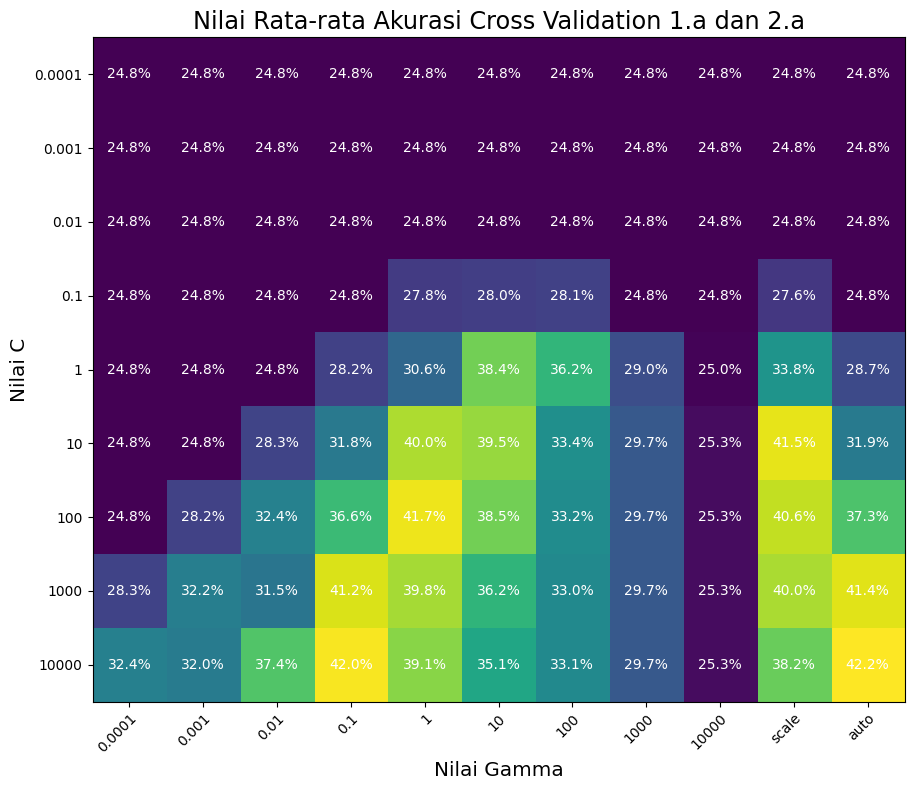

In [ ]:
# Visualisasi
C_range = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
gamma_range = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 'scale', 'auto']

scores = rbf_gridsearch["mean_test_score"].values.reshape(len(C_range), len(gamma_range))
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(8)
im = ax.imshow(scores, cmap='viridis')

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(gamma_range)))
ax.set_xticklabels(gamma_range)
ax.set_xlabel('Nilai Gamma', fontdict={'fontsize':'x-large'})

ax.set_yticks(np.arange(len(C_range)))
ax.set_yticklabels(C_range)
ax.set_ylabel('Nilai C', fontdict={'fontsize':'x-large'})

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(C_range)):
    for j in range(len(gamma_range)):
        text = ax.text(j, i, '{}%'.format(round(scores[i, j]*100,1)),
                       ha="center", va="center", color="w")

ax.set_title("Nilai Rata-rata Akurasi Cross Validation 1.a dan 2.a", fontdict={'fontsize':'xx-large'})

fig.tight_layout()
plt.show()

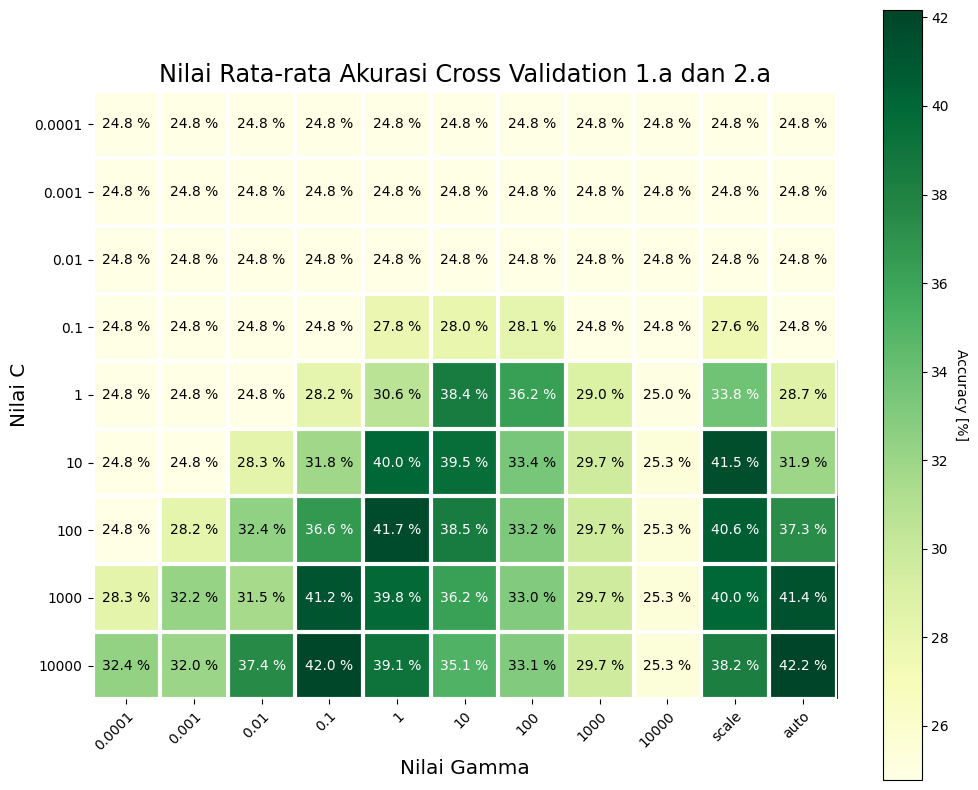

In [ ]:
C_range = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
gamma_range = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 'scale', 'auto']
scores = rbf_gridsearch["mean_test_score"].values.reshape(len(C_range), len(gamma_range))
scores = np.array(scores)*100

fig, ax = plt.subplots()
ax.set_title("Nilai Rata-rata Akurasi Cross Validation 1.a dan 2.a", fontdict={'fontsize':'xx-large'})
ax.set_xlabel('Nilai Gamma', fontdict={'fontsize':'x-large'})
ax.set_ylabel('Nilai C', fontdict={'fontsize':'x-large'})
im, cbar = heatmap(scores, C_range, gamma_range, ax=ax,
                   cmap="YlGn", cbarlabel="Accuracy [%]")
texts = annotate_heatmap(im, valfmt="{x:.1f} %")

fig.set_figwidth(12)
fig.set_figheight(10)
# fig.tight_layout()
plt.show()

In [ ]:
scores = rbf_gridsearch["mean_test_score"]
scores.values.reshape(len(C_range), len(gamma_range))

array([[0.2477907 , 0.2477907 , 0.2477907 , 0.2477907 , 0.2477907 ,
        0.2477907 , 0.2477907 , 0.2477907 , 0.2477907 , 0.2477907 ,
        0.2477907 ],
       [0.2477907 , 0.2477907 , 0.2477907 , 0.2477907 , 0.2477907 ,
        0.2477907 , 0.2477907 , 0.2477907 , 0.2477907 , 0.2477907 ,
        0.2477907 ],
       [0.2477907 , 0.2477907 , 0.2477907 , 0.2477907 , 0.2477907 ,
        0.2477907 , 0.2477907 , 0.2477907 , 0.2477907 , 0.2477907 ,
        0.2477907 ],
       [0.2477907 , 0.2477907 , 0.2477907 , 0.2477907 , 0.2780211 ,
        0.27987726, 0.281264  , 0.2477907 , 0.2477907 , 0.27569552,
        0.2477907 ],
       [0.2477907 , 0.2477907 , 0.2477907 , 0.28174849, 0.30591731,
        0.38446167, 0.36216408, 0.28963394, 0.24965116, 0.33799096,
        0.28686477],
       [0.2477907 , 0.2477907 , 0.28314169, 0.31800388, 0.40027993,
        0.39468992, 0.33425495, 0.29660853, 0.25336994, 0.41515719,
        0.31939922],
       [0.2477907 , 0.28221146, 0.324059  , 0.3663652 , 0.

In [ ]:
clf = SVM(**result.best_params_)
clf.fit(X_train, y_train)

SVC(C=10000, gamma='auto')

In [ ]:
prediksi = clf.predict(X_test)
print(f"Hasil Prediksi : {prediksi}")

print(f"Kelas Aktual : {y_test.values}")

akurasi = clf.score(X_test, y_test)
print(f"Akurasi yang dicapai : {akurasi}")

Hasil Prediksi : [5 3 5 2 1 3 4 2 3 1 4 2 2 3 4 1 5 4 3 4 2 4 5 4 2 3 4 4 4 3 3 1 4 5 2 4 2
 5 4 4 4 3 1 4 3 4 2 5 5 3 4 5 4 5 2 4 4 2 2 1 3 1 5 3 4 1 5 4 5 1 4 2 5 1
 2 4 4 1 2 4 3 1 3 5 1 2 1 2 4 1 4 4 3 2 3 3 1 1 1 3 4 2 3 2 2 1 2 3 1 3 3
 1 4 1 5 2 4 1 3 3 3 1 1 3 5 3 2 2 5 1 2 4 1 4 4 2 2 2 1 3 2 1 1 3 3 4 4 2
 5 4 4 5 3 3 4 2 5 5 2 4 1 1 1 1 1 1 3 5 1 2 2 4 1 4 3 3 3 4 2 5 4 1 1 4 3
 4 3 4 5 3 4 2 1 4 3 4 2 2 3 4 4 4 3 4 2 3 1 4 4 3 1 2 5 5 2 3 1 2 4 3 4 5
 4 4 4 4 5 1 3 2 3 1 4 3 4 4 3 3 1]
Kelas Aktual : [4 4 2 2 1 2 1 4 4 5 4 2 2 2 2 1 3 5 2 4 1 3 2 4 2 2 4 3 4 3 4 1 3 4 2 3 5
 2 2 4 3 4 1 1 3 5 5 5 3 4 4 5 4 4 4 3 4 5 2 4 3 2 5 3 4 5 3 2 2 4 4 3 2 1
 2 5 5 3 3 5 4 1 5 2 4 3 1 5 4 5 5 4 4 4 5 4 1 1 1 5 4 2 3 2 5 4 5 5 4 4 3
 1 4 1 4 2 3 5 3 3 3 5 1 2 2 5 5 4 5 2 2 4 1 3 1 5 4 5 3 3 2 1 1 3 3 3 4 2
 5 3 4 5 3 3 2 5 3 5 1 2 1 1 3 4 3 4 5 2 1 5 2 4 1 2 3 2 2 4 2 4 2 1 1 4 2
 1 5 4 4 2 5 5 1 3 4 2 3 2 2 4 1 2 4 5 2 3 1 4 5 5 4 4 2 5 2 2 1 2 3 3 4 5
 4 4 2 1 5 4 4 2 3 1 1 3 3 3 2 2

Referensi Confusion Matrix



Confusion Matrix:
 [[26  2  0  7  0]
 [ 2 20 13 10  9]
 [ 4  4 19 14  4]
 [10  6 12 27  6]
 [ 5 12  8  9 10]]
Accuracy: 0.42677824267782427
Precision: 0.42418684402510687
Recall: 0.44106908270842693
F1 Score: 0.4259819573657701


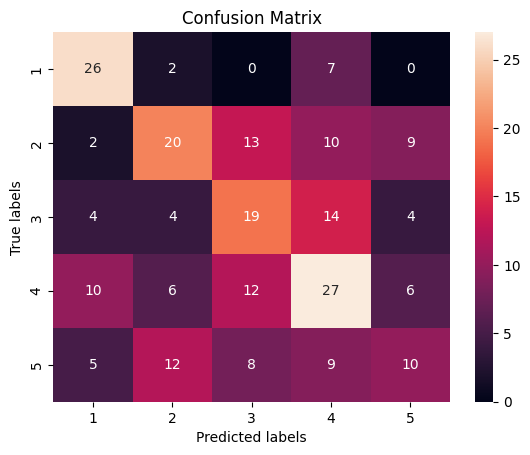

In [ ]:
kelas_prediksi = clf.predict(X_test)
kelas_aktual = y_test.values
label_kelas = [1, 2, 3, 4, 5]

cm = confusion_matrix(kelas_aktual, kelas_prediksi, labels=label_kelas)
# calculate accuracy
accuracy = accuracy_score(kelas_aktual, kelas_prediksi)

# calculate precision
precision = precision_score(kelas_aktual, kelas_prediksi, average='macro')

# calculate recall
recall = recall_score(kelas_aktual, kelas_prediksi, average='macro')

# calculate F1 score
f1 = f1_score(kelas_aktual, kelas_prediksi, average='macro')

print('Confusion Matrix:\n', cm)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

# create a heatmap from the confusion matrix
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax)

# labels, title, and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(label_kelas)
ax.yaxis.set_ticklabels(label_kelas)

plt.show()

In [ ]:
gsc.cv_results_

{'mean_fit_time': array([ 0.22271178,  0.22288642,  0.2174026 ,  0.22118218,  0.22300291,
         0.21992941,  0.22477551,  0.54890919,  0.33485763,  0.22074099,
         0.22120497,  0.2196202 ,  0.21943052,  0.21891327,  0.21928413,
         0.22197564,  0.21954002,  0.22297032,  0.35228047,  0.23492713,
         0.21815345,  0.21751742,  0.21744826,  0.22166939,  0.21698675,
         0.22303474,  0.22374206,  0.22577691,  0.22760034,  0.46987112,
         0.24409614,  0.22362978,  0.21731226,  0.2207927 ,  0.22137263,
         0.21756277,  0.22111852,  0.22202191,  0.22450109,  0.2312588 ,
         0.35671575,  0.24302206,  0.22496874,  0.21750026,  0.21842473,
         0.21588414,  0.22010262,  0.23044686,  0.22524977,  0.22956991,
         0.23452303,  0.40260289,  0.29251344,  0.22571144,  0.22724955,
         0.21879959,  0.21851583,  0.22258618,  0.23188355,  0.22629008,
         0.22649951,  0.2332572 ,  0.39907606,  0.29312615,  0.22612915,
         0.22801657,  0.21771774, 

In [ ]:
rbf_gridsearch = pd.DataFrame(data=result.cv_results_).sort_values(by='rank_test_score', ascending=True)
rbf_gridsearch

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_decision_function_shape,param_gamma,param_kernel,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
98,2.320812,0.559764,0.027621,0.008178,10000,ovr,auto,rbf,"{'C': 10000, 'decision_function_shape': 'ovr',...",0.412037,...,0.395349,0.460465,0.437209,0.437209,0.427907,0.432558,0.400000,0.421669,0.020886,1
91,1.836480,0.467530,0.026292,0.006877,10000,ovr,0.1,rbf,"{'C': 10000, 'decision_function_shape': 'ovr',...",0.412037,...,0.376744,0.404651,0.483721,0.455814,0.437209,0.423256,0.395349,0.419808,0.029830,2
70,0.333997,0.036691,0.023917,0.000940,100,ovr,1,rbf,"{'C': 100, 'decision_function_shape': 'ovr', '...",0.444444,...,0.376744,0.451163,0.423256,0.451163,0.395349,0.427907,0.404651,0.417003,0.026008,3
64,0.371862,0.077979,0.042142,0.008906,10,ovr,scale,rbf,"{'C': 10, 'decision_function_shape': 'ovr', 'g...",0.412037,...,0.390698,0.437209,0.427907,0.423256,0.400000,0.418605,0.404651,0.415157,0.018044,4
87,0.565790,0.156615,0.028447,0.008633,1000,ovr,auto,rbf,"{'C': 1000, 'decision_function_shape': 'ovr', ...",0.425926,...,0.395349,0.404651,0.446512,0.451163,0.413953,0.390698,0.390698,0.413755,0.021294,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34,0.227538,0.004046,0.029252,0.004387,0.1,ovr,0.001,rbf,"{'C': 0.1, 'decision_function_shape': 'ovr', '...",0.250000,...,0.246512,0.246512,0.246512,0.246512,0.246512,0.251163,0.251163,0.247791,0.001977,54
33,0.222852,0.006796,0.026121,0.002017,0.1,ovr,0.0001,rbf,"{'C': 0.1, 'decision_function_shape': 'ovr', '...",0.250000,...,0.246512,0.246512,0.246512,0.246512,0.246512,0.251163,0.251163,0.247791,0.001977,54
32,0.237462,0.008837,0.027223,0.003120,0.01,ovr,auto,rbf,"{'C': 0.01, 'decision_function_shape': 'ovr', ...",0.250000,...,0.246512,0.246512,0.246512,0.246512,0.246512,0.251163,0.251163,0.247791,0.001977,54
41,0.324753,0.007355,0.028867,0.000343,0.1,ovr,10000,rbf,"{'C': 0.1, 'decision_function_shape': 'ovr', '...",0.250000,...,0.246512,0.246512,0.246512,0.246512,0.246512,0.251163,0.251163,0.247791,0.001977,54


In [ ]:
rbf_gridsearch = pd.DataFrame(data=gsc.cv_results_).sort_values(by='rank_test_score', ascending=True)
rbf_gridsearch

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_decision_function_shape,param_gamma,param_kernel,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
98,1.942729,0.136544,0.019363,0.001431,10000,ovr,auto,rbf,"{'C': 10000, 'decision_function_shape': 'ovr',...",0.412037,...,0.395349,0.460465,0.437209,0.437209,0.427907,0.432558,0.400000,0.421669,0.020886,1
91,1.565127,0.080125,0.019174,0.000793,10000,ovr,0.1,rbf,"{'C': 10000, 'decision_function_shape': 'ovr',...",0.412037,...,0.376744,0.404651,0.483721,0.455814,0.437209,0.423256,0.395349,0.419808,0.029830,2
70,0.310360,0.006241,0.019528,0.001673,100,ovr,1,rbf,"{'C': 100, 'decision_function_shape': 'ovr', '...",0.444444,...,0.376744,0.451163,0.423256,0.451163,0.395349,0.427907,0.404651,0.417003,0.026008,3
64,0.218980,0.004993,0.020361,0.001686,10,ovr,scale,rbf,"{'C': 10, 'decision_function_shape': 'ovr', 'g...",0.412037,...,0.390698,0.437209,0.427907,0.423256,0.400000,0.418605,0.404651,0.415157,0.018044,4
87,0.449177,0.015313,0.019342,0.000451,1000,ovr,auto,rbf,"{'C': 1000, 'decision_function_shape': 'ovr', ...",0.425926,...,0.395349,0.404651,0.446512,0.451163,0.413953,0.390698,0.390698,0.413755,0.021294,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34,0.222271,0.006728,0.021264,0.001780,0.1,ovr,0.001,rbf,"{'C': 0.1, 'decision_function_shape': 'ovr', '...",0.250000,...,0.246512,0.246512,0.246512,0.246512,0.246512,0.251163,0.251163,0.247791,0.001977,54
33,0.220123,0.006297,0.021038,0.001192,0.1,ovr,0.0001,rbf,"{'C': 0.1, 'decision_function_shape': 'ovr', '...",0.250000,...,0.246512,0.246512,0.246512,0.246512,0.246512,0.251163,0.251163,0.247791,0.001977,54
32,0.225492,0.004442,0.021001,0.001018,0.01,ovr,auto,rbf,"{'C': 0.01, 'decision_function_shape': 'ovr', ...",0.250000,...,0.246512,0.246512,0.246512,0.246512,0.246512,0.251163,0.251163,0.247791,0.001977,54
41,0.305807,0.011541,0.023929,0.000302,0.1,ovr,10000,rbf,"{'C': 0.1, 'decision_function_shape': 'ovr', '...",0.250000,...,0.246512,0.246512,0.246512,0.246512,0.246512,0.251163,0.251163,0.247791,0.001977,54


## Kernel Polynomial

GridSearchCV Kernel Polynomial

In [ ]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
gsc = GridSearchCV(estimator=SVM(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [0.1, 1, 'auto', 'scale'],
                         'kernel': ['poly'],
                         'degree': [2, 3],
                         'decision_function_shape': ['ovr']
                         },
             cv=kfold)

In [ ]:
result = gsc.fit(X_train, y_train)
result.best_params_

{'C': 100,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'poly'}

In [ ]:
import joblib

#save your model or results
joblib.dump(result, '/content/drive/MyDrive/poly_1a_2b.pkl')
# joblib.dump(result, '/content/drive/MyDrive/poly_ovr_1a_2b.pkl')

['/content/drive/MyDrive/poly_1a_2b.pkl']

In [ ]:
#load your model for further usage
result = joblib.load("/content/drive/MyDrive/poly_1a_2b.pkl")
# result = joblib.load("/content/drive/MyDrive/poly_ovr_1a_2b.pkl")

In [ ]:
# Fit the grid search model with the training data
# gsc.fit(X_train, y_train)
# gsc.best_params_

In [ ]:
print(result)
print(result.best_params_)
print(result.best_score_)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'decision_function_shape': ['ovr'], 'degree': [2, 3],
                         'gamma': [0.1, 1, 'auto', 'scale'],
                         'kernel': ['poly']})
{'C': 100, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}
0.38587639965546944


In [ ]:
# Score the grid search model with the testing data
print(f'{result.score(X_test, y_test)}')

0.38493723849372385


In [ ]:
result.cv_results_

{'mean_fit_time': array([ 0.1819865 ,  0.18434491,  0.17925048,  0.1820751 ,  0.17163358,
         0.18174767,  0.17185905,  0.18217313,  0.18150203,  0.18211818,
         0.17785418,  0.1862978 ,  0.17884803,  0.18597548,  0.17936802,
         0.21185503,  0.18209014,  0.191029  ,  0.18467739,  0.21968219,
         0.18231835,  0.22746842,  0.18199623,  0.46578586,  0.18115497,
         0.29696479,  0.1846745 ,  0.57637711,  0.18066342,  0.58227925,
         0.1819715 ,  2.42201233,  0.19248276,  1.24961319,  0.19971509,
         3.87382381,  0.18265643,  3.58950365,  0.191799  , 28.19448142]),
 'std_fit_time': array([0.01033252, 0.00570961, 0.01064673, 0.00513744, 0.00736222,
        0.00557211, 0.00398351, 0.00545615, 0.01037374, 0.00615129,
        0.00576892, 0.0061991 , 0.01215269, 0.01061638, 0.00930675,
        0.00842588, 0.00887792, 0.00579891, 0.00976889, 0.00766411,
        0.00818987, 0.00569858, 0.00837325, 0.02292582, 0.00727806,
        0.00787069, 0.0049675 , 0.0356801

In [ ]:
poly_ovr_gridsearch = pd.DataFrame(data=result.cv_results_)
poly_ovr_2_gs = poly_ovr_gridsearch[poly_ovr_gridsearch['param_degree']==2]
poly_ovr_2_gs

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_decision_function_shape,param_degree,param_gamma,param_kernel,params,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.181986,0.010333,0.012751,0.000156,0.01,ovr,2,0.1,poly,"{'C': 0.01, 'decision_function_shape': 'ovr', ...",...,0.246512,0.246512,0.246512,0.246512,0.246512,0.251163,0.251163,0.247791,0.001977,29
1,0.184345,0.005710,0.013163,0.001267,0.01,ovr,2,1,poly,"{'C': 0.01, 'decision_function_shape': 'ovr', ...",...,0.246512,0.246512,0.246512,0.246512,0.246512,0.251163,0.251163,0.247791,0.001977,29
2,0.179250,0.010647,0.012836,0.000338,0.01,ovr,2,auto,poly,"{'C': 0.01, 'decision_function_shape': 'ovr', ...",...,0.246512,0.246512,0.246512,0.246512,0.246512,0.251163,0.251163,0.247791,0.001977,29
3,0.182075,0.005137,0.013729,0.002847,0.01,ovr,2,scale,poly,"{'C': 0.01, 'decision_function_shape': 'ovr', ...",...,0.251163,0.283721,0.306977,0.274419,0.269767,0.274419,0.260465,0.279419,0.022500,25
8,0.181502,0.010374,0.012724,0.000209,0.1,ovr,2,0.1,poly,"{'C': 0.1, 'decision_function_shape': 'ovr', '...",...,0.246512,0.246512,0.246512,0.246512,0.246512,0.251163,0.251163,0.247791,0.001977,29
9,0.182118,0.006151,0.012864,0.000662,0.1,ovr,2,1,poly,"{'C': 0.1, 'decision_function_shape': 'ovr', '...",...,0.269767,0.279070,0.339535,0.288372,0.297674,0.293023,0.311628,0.291514,0.027157,22
10,0.177854,0.005769,0.012877,0.000579,0.1,ovr,2,auto,poly,"{'C': 0.1, 'decision_function_shape': 'ovr', '...",...,0.246512,0.246512,0.246512,0.246512,0.246512,0.251163,0.251163,0.247791,0.001977,29
11,0.186298,0.006199,0.012762,0.000752,0.1,ovr,2,scale,poly,"{'C': 0.1, 'decision_function_shape': 'ovr', '...",...,0.288372,0.274419,0.339535,0.311628,0.316279,0.330233,0.344186,0.308712,0.025770,12
16,0.182090,0.008878,0.012813,0.000255,1,ovr,2,0.1,poly,"{'C': 1, 'decision_function_shape': 'ovr', 'de...",...,0.246512,0.246512,0.246512,0.246512,0.246512,0.251163,0.251163,0.247791,0.001977,29
17,0.191029,0.005799,0.013238,0.001459,1,ovr,2,1,poly,"{'C': 1, 'decision_function_shape': 'ovr', 'de...",...,0.302326,0.293023,0.325581,0.293023,0.316279,0.320930,0.358140,0.305000,0.027683,14


In [ ]:
C_range = [0.01, 0.1, 1, 10, 100]
gamma_range = [0.1, 1, 'auto', 'scale']

scores = poly_ovr_2_gs["mean_test_score"]
scores.values.reshape(len(C_range), len(gamma_range))

array([[0.2477907 , 0.2477907 , 0.2477907 , 0.2794186 ],
       [0.2477907 , 0.29151378, 0.2477907 , 0.30871232],
       [0.2477907 , 0.305     , 0.25244401, 0.30127692],
       [0.29151378, 0.31056848, 0.30592377, 0.31939707],
       [0.30453704, 0.33148579, 0.3105814 , 0.34682817]])

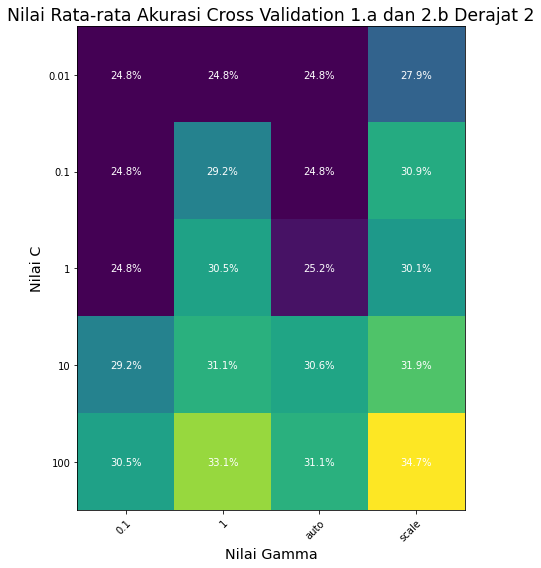

In [ ]:
# Visualisasi
C_range = [0.01, 0.1, 1, 10, 100]
gamma_range = [0.1, 1, 'auto', 'scale']

scores = poly_ovr_2_gs["mean_test_score"].values.reshape(len(C_range), len(gamma_range))
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(8)
im = ax.imshow(scores, cmap='viridis')

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(gamma_range)))
ax.set_xticklabels(gamma_range)
ax.set_xlabel('Nilai Gamma', fontdict={'fontsize':'x-large'})

ax.set_yticks(np.arange(len(C_range)))
ax.set_yticklabels(C_range)
ax.set_ylabel('Nilai C', fontdict={'fontsize':'x-large'})

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(C_range)):
    for j in range(len(gamma_range)):
        text = ax.text(j, i, '{}%'.format(round(scores[i, j]*100,1)),
                       ha="center", va="center", color="w")

ax.set_title("Nilai Rata-rata Akurasi Cross Validation 1.a dan 2.b Derajat 2", fontdict={'fontsize':'xx-large'})

fig.tight_layout()
plt.show()

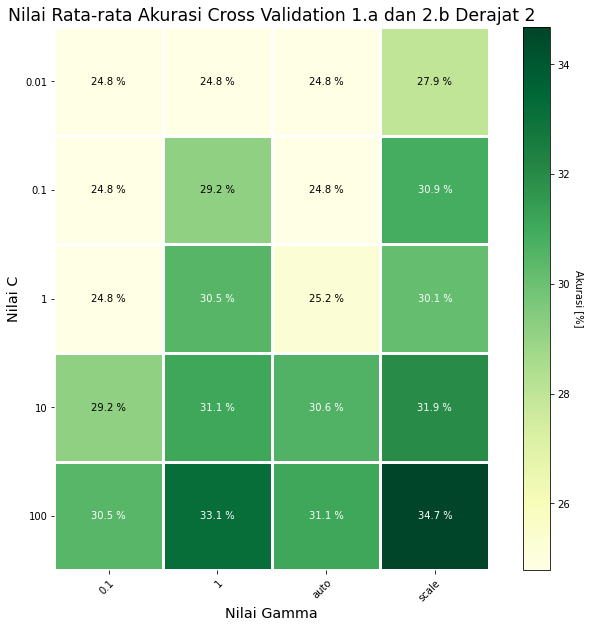

In [ ]:
C_range = [0.01, 0.1, 1, 10, 100]
gamma_range = [0.1, 1, 'auto', 'scale']
scores = poly_ovr_2_gs["mean_test_score"].values.reshape(len(C_range), len(gamma_range))
scores = np.array(scores)*100

fig, ax = plt.subplots()
ax.set_title("Nilai Rata-rata Akurasi Cross Validation 1.a dan 2.b Derajat 2", fontdict={'fontsize':'xx-large'})
ax.set_xlabel('Nilai Gamma', fontdict={'fontsize':'x-large'})
ax.set_ylabel('Nilai C', fontdict={'fontsize':'x-large'})
im, cbar = heatmap(scores, C_range, gamma_range, ax=ax,
                   cmap="YlGn", cbarlabel="Akurasi [%]")
texts = annotate_heatmap(im, valfmt="{x:.1f} %")

fig.set_figwidth(12)
fig.set_figheight(10)
# fig.tight_layout()
plt.show()

In [ ]:
poly_ovr_3_gs = poly_ovr_gridsearch[poly_ovr_gridsearch['param_degree']==3]
poly_ovr_3_gs

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_decision_function_shape,param_degree,param_gamma,param_kernel,params,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
4,0.171634,0.007362,0.013569,0.002413,0.01,ovr,3,0.1,poly,"{'C': 0.01, 'decision_function_shape': 'ovr', ...",...,0.246512,0.246512,0.246512,0.246512,0.246512,0.251163,0.251163,0.247791,0.001977,29
5,0.181748,0.005572,0.012654,0.000148,0.01,ovr,3,1,poly,"{'C': 0.01, 'decision_function_shape': 'ovr', ...",...,0.260465,0.288372,0.316279,0.274419,0.288372,0.260465,0.255814,0.277565,0.023175,26
6,0.171859,0.003984,0.013147,0.001467,0.01,ovr,3,auto,poly,"{'C': 0.01, 'decision_function_shape': 'ovr', ...",...,0.246512,0.246512,0.246512,0.246512,0.246512,0.251163,0.251163,0.247791,0.001977,29
7,0.182173,0.005456,0.012888,0.001228,0.01,ovr,3,scale,poly,"{'C': 0.01, 'decision_function_shape': 'ovr', ...",...,0.274419,0.293023,0.316279,0.288372,0.306977,0.297674,0.344186,0.298015,0.020917,20
12,0.178848,0.012153,0.012682,0.000130,0.1,ovr,3,0.1,poly,"{'C': 0.1, 'decision_function_shape': 'ovr', '...",...,0.246512,0.246512,0.246512,0.246512,0.246512,0.251163,0.251163,0.247791,0.001977,29
13,0.185975,0.010616,0.012657,0.000402,0.1,ovr,3,1,poly,"{'C': 0.1, 'decision_function_shape': 'ovr', '...",...,0.283721,0.288372,0.316279,0.293023,0.288372,0.302326,0.334884,0.298941,0.016547,18
14,0.179368,0.009307,0.012804,0.000368,0.1,ovr,3,auto,poly,"{'C': 0.1, 'decision_function_shape': 'ovr', '...",...,0.246512,0.246512,0.246512,0.246512,0.246512,0.251163,0.251163,0.247791,0.001977,29
15,0.211855,0.008426,0.012858,0.001253,0.1,ovr,3,scale,poly,"{'C': 0.1, 'decision_function_shape': 'ovr', '...",...,0.311628,0.320930,0.334884,0.279070,0.293023,0.288372,0.306977,0.303596,0.019628,16
20,0.182318,0.008190,0.012949,0.000859,1,ovr,3,0.1,poly,"{'C': 1, 'decision_function_shape': 'ovr', 'de...",...,0.246512,0.246512,0.246512,0.246512,0.246512,0.251163,0.251163,0.247791,0.001977,29
21,0.227468,0.005699,0.012931,0.001043,1,ovr,3,1,poly,"{'C': 1, 'decision_function_shape': 'ovr', 'de...",...,0.334884,0.311628,0.353488,0.293023,0.306977,0.293023,0.330233,0.312892,0.020577,9


In [ ]:
C_range = [0.01, 0.1, 1, 10, 100]
gamma_range = [0.1, 1, 'auto', 'scale']

scores = poly_ovr_3_gs["mean_test_score"]
scores.values.reshape(len(C_range), len(gamma_range))

array([[0.2477907 , 0.2775646 , 0.2477907 , 0.29801464],
       [0.2477907 , 0.29894057, 0.2477907 , 0.30359604],
       [0.2477907 , 0.3128919 , 0.2477907 , 0.33799526],
       [0.2775646 , 0.34682817, 0.29151163, 0.36682601],
       [0.29894057, 0.36589578, 0.29709302, 0.3858764 ]])

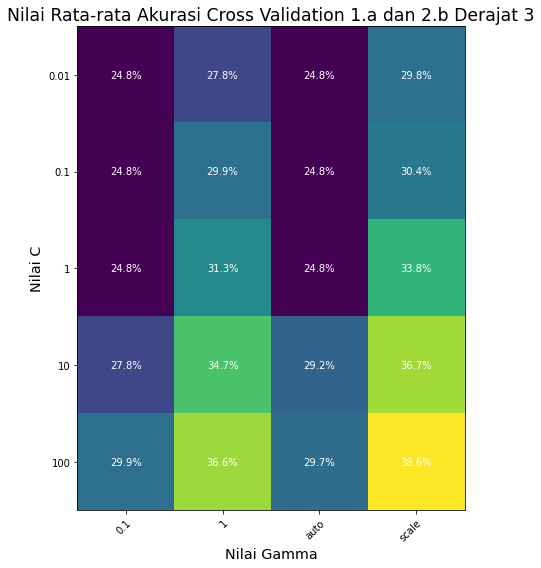

In [ ]:
# Visualisasi
C_range = [0.01, 0.1, 1, 10, 100]
gamma_range = [0.1, 1, 'auto', 'scale']

scores = poly_ovr_3_gs["mean_test_score"].values.reshape(len(C_range), len(gamma_range))
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(8)
im = ax.imshow(scores, cmap='viridis')

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(gamma_range)))
ax.set_xticklabels(gamma_range)
ax.set_xlabel('Nilai Gamma', fontdict={'fontsize':'x-large'})

ax.set_yticks(np.arange(len(C_range)))
ax.set_yticklabels(C_range)
ax.set_ylabel('Nilai C', fontdict={'fontsize':'x-large'})

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(C_range)):
    for j in range(len(gamma_range)):
        text = ax.text(j, i, '{}%'.format(round(scores[i, j]*100,1)),
                       ha="center", va="center", color="w")

ax.set_title("Nilai Rata-rata Akurasi Cross Validation 1.a dan 2.b Derajat 3", fontdict={'fontsize':'xx-large'})

fig.tight_layout()
plt.show()

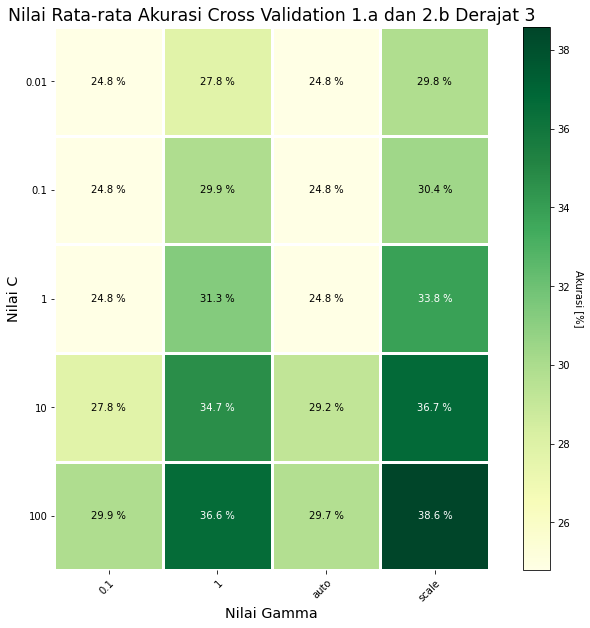

In [ ]:
C_range = [0.01, 0.1, 1, 10, 100]
gamma_range = [0.1, 1, 'auto', 'scale']
scores = poly_ovr_3_gs["mean_test_score"].values.reshape(len(C_range), len(gamma_range))
scores = np.array(scores)*100

fig, ax = plt.subplots()
ax.set_title("Nilai Rata-rata Akurasi Cross Validation 1.a dan 2.b Derajat 3", fontdict={'fontsize':'xx-large'})
ax.set_xlabel('Nilai Gamma', fontdict={'fontsize':'x-large'})
ax.set_ylabel('Nilai C', fontdict={'fontsize':'x-large'})
im, cbar = heatmap(scores, C_range, gamma_range, ax=ax,
                   cmap="YlGn", cbarlabel="Akurasi [%]")
texts = annotate_heatmap(im, valfmt="{x:.1f} %")

fig.set_figwidth(12)
fig.set_figheight(10)
# fig.tight_layout()
plt.show()

[.var() Python](https://media.geeksforgeeks.org/wp-content/uploads/var.jpg)

In [ ]:
n_features = X_train.shape[1]
gamma_scale = 1 / (n_features * X_train.var()) # gamma : 'scale'
gamma_auto = 1 / n_features # gamma : 'auto'

print(f'n_features: {n_features}')
print(f'X_train.var(): {X_train.var()}')
print(f'gamma_scale: {gamma_scale}')
print(f'gamma_auto: {gamma_auto}')

n_features: 7
X_train.var(): 0.0756616329584728
gamma_scale: 1.8881054673449966
gamma_auto: 0.14285714285714285


In [ ]:
gsc.cv_results_

{'mean_fit_time': array([ 0.1819865 ,  0.18434491,  0.17925048,  0.1820751 ,  0.17163358,
         0.18174767,  0.17185905,  0.18217313,  0.18150203,  0.18211818,
         0.17785418,  0.1862978 ,  0.17884803,  0.18597548,  0.17936802,
         0.21185503,  0.18209014,  0.191029  ,  0.18467739,  0.21968219,
         0.18231835,  0.22746842,  0.18199623,  0.46578586,  0.18115497,
         0.29696479,  0.1846745 ,  0.57637711,  0.18066342,  0.58227925,
         0.1819715 ,  2.42201233,  0.19248276,  1.24961319,  0.19971509,
         3.87382381,  0.18265643,  3.58950365,  0.191799  , 28.19448142]),
 'std_fit_time': array([0.01033252, 0.00570961, 0.01064673, 0.00513744, 0.00736222,
        0.00557211, 0.00398351, 0.00545615, 0.01037374, 0.00615129,
        0.00576892, 0.0061991 , 0.01215269, 0.01061638, 0.00930675,
        0.00842588, 0.00887792, 0.00579891, 0.00976889, 0.00766411,
        0.00818987, 0.00569858, 0.00837325, 0.02292582, 0.00727806,
        0.00787069, 0.0049675 , 0.0356801

In [ ]:
poly_gridsearch = pd.DataFrame(data=gsc.cv_results_).sort_values(by='rank_test_score', ascending=True)
# poly_gridsearch.to_csv('/content/drive/MyDrive/poly_ovr_gridsearch_1a2b.csv')
poly_gridsearch

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_decision_function_shape,param_degree,param_gamma,param_kernel,params,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
39,28.194481,2.391436,0.012335,0.000953,100,ovr,3,scale,poly,"{'C': 100, 'decision_function_shape': 'ovr', '...",...,0.353488,0.427907,0.376744,0.437209,0.404651,0.390698,0.358140,0.385876,0.027636,1
31,2.422012,0.102823,0.012308,0.000343,10,ovr,3,scale,poly,"{'C': 10, 'decision_function_shape': 'ovr', 'd...",...,0.339535,0.404651,0.381395,0.376744,0.390698,0.367442,0.358140,0.366826,0.022343,2
37,3.589504,0.241622,0.012189,0.000288,100,ovr,3,1,poly,"{'C': 100, 'decision_function_shape': 'ovr', '...",...,0.330233,0.409302,0.390698,0.376744,0.381395,0.381395,0.348837,0.365896,0.025890,3
35,3.873824,0.364413,0.012297,0.000091,100,ovr,2,scale,poly,"{'C': 100, 'decision_function_shape': 'ovr', '...",...,0.362791,0.325581,0.400000,0.311628,0.381395,0.344186,0.320930,0.346828,0.027283,4
29,0.582279,0.035814,0.012833,0.001492,10,ovr,3,1,poly,"{'C': 10, 'decision_function_shape': 'ovr', 'd...",...,0.330233,0.339535,0.400000,0.358140,0.334884,0.362791,0.334884,0.346828,0.022310,4
23,0.465786,0.022926,0.013701,0.002716,1,ovr,3,scale,poly,"{'C': 1, 'decision_function_shape': 'ovr', 'de...",...,0.316279,0.320930,0.381395,0.358140,0.339535,0.339535,0.339535,0.337995,0.019608,6
33,1.249613,0.102811,0.012554,0.000329,100,ovr,2,1,poly,"{'C': 100, 'decision_function_shape': 'ovr', '...",...,0.367442,0.306977,0.372093,0.283721,0.353488,0.334884,0.316279,0.331486,0.027494,7
27,0.576377,0.035680,0.012476,0.000212,10,ovr,2,scale,poly,"{'C': 10, 'decision_function_shape': 'ovr', 'd...",...,0.344186,0.288372,0.344186,0.288372,0.330233,0.339535,0.306977,0.319397,0.021864,8
21,0.227468,0.005699,0.012931,0.001043,1,ovr,3,1,poly,"{'C': 1, 'decision_function_shape': 'ovr', 'de...",...,0.334884,0.311628,0.353488,0.293023,0.306977,0.293023,0.330233,0.312892,0.020577,9
34,0.199715,0.007203,0.012481,0.000225,100,ovr,2,auto,poly,"{'C': 100, 'decision_function_shape': 'ovr', '...",...,0.306977,0.293023,0.353488,0.306977,0.325581,0.339535,0.320930,0.310581,0.027597,10


In [ ]:
c_param = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
g_params = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 'scale', 'auto']
i = 4 # C = 1

c1 = []
for g_param in g_params:
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    svm=SVM(C=c_param[i], decision_function_shape='ovr', gamma=g_param, kernel='poly', degree=4)
    scores = cross_val_score(svm, X_train, y_train, cv=kfold)
    hasil = [c_param[i], g_param, scores[0], scores[1], scores[2], scores[3], scores[4], scores.mean()]
    c1.append(hasil)
c1

In [ ]:
clf = SVM(**result.best_params_)
clf.fit(X_train, y_train)

SVC(C=100, kernel='poly')

In [ ]:
n_features = X_train.shape[1]
gamma = 1 / (n_features * X_train.var())

clf._gamma

1.8881054673449966

In [ ]:
prediksi = clf.predict(X_test)
print(f"Hasil Prediksi : {prediksi}")

akurasi = clf.score(X_test, y_test)
print(f"Akurasi yang dicapai : {akurasi}")

Hasil Prediksi : [5 3 5 2 1 3 4 2 3 4 4 2 2 3 4 1 5 2 3 1 2 4 5 4 2 3 4 4 4 3 3 1 3 5 2 4 2
 5 4 4 4 3 1 4 3 4 2 5 5 3 4 2 4 3 2 4 3 2 2 1 5 1 3 3 4 1 5 4 5 1 4 2 5 1
 2 4 4 3 2 4 3 1 3 1 1 2 4 2 4 1 4 4 3 2 4 2 1 1 1 3 4 2 3 2 2 1 2 5 1 3 3
 1 1 1 5 2 4 4 3 3 3 4 1 2 5 3 2 2 5 1 2 4 1 4 4 2 2 2 1 3 2 1 1 5 3 3 4 2
 2 4 4 5 3 1 4 2 5 5 4 4 1 1 1 3 1 3 4 5 1 4 3 1 1 4 3 3 3 4 2 2 4 4 4 4 2
 4 3 4 3 3 4 2 1 1 3 3 2 2 3 5 1 4 5 4 2 3 1 2 4 2 1 2 5 5 5 3 1 2 4 3 4 5
 4 4 4 1 5 1 3 5 3 1 4 3 5 1 4 3 1]
Akurasi yang dicapai : 0.38493723849372385


Confusion Matrix:
 [[25  1  0  9  0]
 [ 3 19 12 10 10]
 [ 6  4 19  9  7]
 [11  9 15 21  5]
 [ 2 15  5 14  8]]
Accuracy: 0.38493723849372385
Precision: 0.3800594493116395
Recall: 0.40288805305198744
F1 Score: 0.38661286882754464


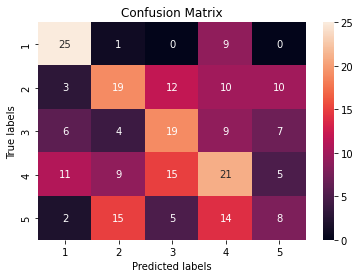

In [ ]:
kelas_prediksi = clf.predict(X_test)
kelas_aktual = y_test.values
label_kelas = [1, 2, 3, 4, 5]

cm = confusion_matrix(kelas_aktual, kelas_prediksi, labels=label_kelas)
# calculate accuracy
accuracy = accuracy_score(kelas_aktual, kelas_prediksi)

# calculate precision
precision = precision_score(kelas_aktual, kelas_prediksi, average='macro')

# calculate recall
recall = recall_score(kelas_aktual, kelas_prediksi, average='macro')

# calculate F1 score
f1 = f1_score(kelas_aktual, kelas_prediksi, average='macro')

print('Confusion Matrix:\n', cm)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

# create a heatmap from the confusion matrix
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax)

# labels, title, and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(label_kelas)
ax.yaxis.set_ticklabels(label_kelas)

plt.show()

In [ ]:
def classification(data_file, rounds=100, remove_disperse=[]):
    df = pd.read_csv(data_file)
    df = df.drop(["Nama File"], axis=1)

    if remove_disperse:
        df = df.drop(remove_disperse, axis=1)

    X = df.drop(["Kelas"], axis=1)
    y = df["Kelas"]

    ans = {key: {"score": [], "sens": [], "spec": []}
           for key, value in classifiers.items()}

    print("Classifying...")

    for i in range(rounds):
        X_train, X_test, y_train, y_test = data_split(X, y, test_size=0.3)

        for name, classifier in classifiers.items():
            # scaler = StandardScaler()
            scaler = MinMaxScaler(feature_range = (0, 1))
            # scaler = MinMaxScaler(feature_range = (-1, 1))
            scaler.fit(X_train)
            X_train = scaler.transform(X_train)
            X_test = scaler.transform(X_test)

            classifier.fit(X_train, y_train)
            score = classifier.score(X_test, y_test)

            ans[name]["score"].append(score)

    print("Classification done!")

    return ans

In [ ]:
def sumary(ans, title="Summary"):
    size = 70
    separator = "-"

    print(separator*size)
    print("SUMARY: {}".format(title))
    print(separator*size)
    print("CLASSIF\t\tMEAN\tMEDIAN\tMINV\tMAXV\tSTD")
    print(separator*size)

    for n in ans:
        m = round(np.mean(ans[n]["score"])*100, 2)
        med = round(np.median(ans[n]["score"])*100, 2)
        minv = round(np.min(ans[n]["score"])*100, 2)
        maxv = round(np.max(ans[n]["score"])*100, 2)
        std = round(np.std(ans[n]["score"])*100, 2)

        print("{:<16}{}\t{}\t{}\t{}\t{}".format(n, m, med, minv, maxv, std))

    print(separator*size)
    print()

Hasil klasifikasi SVm dengan Otsu Thresholding
Scaller 0 sampai 1

In [ ]:
data_file = "/content/drive/MyDrive/Skripsi/Ekstraksi Fitur/after_augmentation_thresholding/OtsuThres_5Class.csv"

ans = classification(data_file)

Classifying...
Classification done!


In [ ]:
sumary(ans)

----------------------------------------------------------------------
SUMARY: Summary
----------------------------------------------------------------------
CLASSIF		MEAN	MEDIAN	MINV	MAXV	STD
----------------------------------------------------------------------
SVM_radial_OVO  34.13	34.17	31.97	36.15	0.71
----------------------------------------------------------------------



Hasil Klasifikasi SVM dengan Otsu Thresholding
Scaller -1 sampai 1

In [ ]:
data_file = "/content/drive/MyDrive/Skripsi/Ekstraksi Fitur/after_augmentation_thresholding/OtsuThres_5Class.csv"

ans = classification(data_file)

Classifying...
Classification done!


In [ ]:
sumary(ans)

----------------------------------------------------------------------
SUMARY: Summary
----------------------------------------------------------------------
CLASSIF		MEAN	MEDIAN	MINV	MAXV	STD
----------------------------------------------------------------------
SVM_radial_OVO  32.41	32.29	30.6	34.45	0.78
----------------------------------------------------------------------



Hasil Klasifikasi SVM dengan Color Moment
Scaller -1 sampai 1

In [ ]:
data_file = "/content/drive/MyDrive/Skripsi/Ekstraksi Fitur/Color Moment/ColorMoment_5Class.csv"

ans = classification(data_file)

Classifying...
Classification done!


In [ ]:
sumary(ans)

----------------------------------------------------------------------
SUMARY: Summary
----------------------------------------------------------------------
CLASSIF		MEAN	MEDIAN	MINV	MAXV	STD
----------------------------------------------------------------------
SVM_radial_OVO  59.2	59.14	55.79	62.62	1.54
----------------------------------------------------------------------



# Perhitungan Manual

## Prapemrosesan Data

In [ ]:
# Pra-Pemrosesan Data

# Menggunakan citra cardboard1.jpg yang diresize dari ukuran asli (512x384) ke ukuran 8x8
# proses resize bertujuan memudahkan penjelasan perhitungan manual
img = cv2.imread('/content/drive/MyDrive/Skripsi/dataset-resized/cardboard/cardboard1.jpg') # Reading Image

# Get original height and width
print(f"Original Dimensions : {img.shape}")

# resize image by specifying custom width and height
resized = cv2.resize(img, (8, 8)) #Rumus resize yang digunakan menggunakan interpolasi linear

print(f"Resized Dimensions : {resized.shape}")

Original Dimensions : (384, 512, 3)
Resized Dimensions : (8, 8, 3)


Save NumPy Arrays to CSV Files
https://crunchcrunchhuman.com/2021/12/25/numpy-save-csv-write/

CSV is a human-readable, tabular format. This means only 1D and 2D NumPy arrays can be written to CSV.

In [ ]:
# save 3D array to binary NPY format
np.save('cardboard1_resized.npy', resized)

In [ ]:
resized_BGR = np.load('/content/drive/MyDrive/cardboard1_resized.npy')
resized_RGB = cv2.cvtColor(resized_BGR, cv2.COLOR_BGR2RGB)

In [ ]:
print(f'rezized BGR : \n{resized_BGR}')
print(f'rezized RGB : \n{resized_RGB}')

rezized BGR : 
[[[172 202 244]
  [162 190 231]
  [166 194 230]
  [160 190 225]
  [164 197 231]
  [149 183 218]
  [145 173 212]
  [140 169 209]]

 [[163 192 236]
  [162 194 230]
  [164 194 229]
  [156 186 221]
  [156 187 222]
  [145 177 215]
  [138 167 204]
  [132 161 200]]

 [[166 198 234]
  [157 189 225]
  [156 188 223]
  [152 185 218]
  [144 177 210]
  [141 173 208]
  [129 160 195]
  [123 150 186]]

 [[149 181 217]
  [155 187 222]
  [153 185 219]
  [146 179 212]
  [143 175 207]
  [131 163 197]
  [123 153 188]
  [101 128 161]]

 [[ 71  95 120]
  [126 155 188]
  [144 174 205]
  [153 188 224]
  [137 172 202]
  [127 158 192]
  [124 153 188]
  [ 91 117 147]]

 [[116 145 181]
  [127 155 190]
  [120 148 181]
  [115 144 175]
  [107 136 167]
  [100 129 160]
  [ 98 126 158]
  [ 64  89 109]]

 [[121 149 184]
  [121 147 182]
  [113 139 173]
  [106 134 165]
  [102 130 160]
  [ 94 122 153]
  [ 96 122 154]
  [ 63  87 107]]

 [[119 146 177]
  [117 142 176]
  [113 138 170]
  [106 132 162]
  [ 99 125 

In [ ]:
print(f'rezized RGB[0] : \n{resized_RGB[0]}')
print(f'rezized RGB[1] : \n{resized_RGB[1]}')
print(f'rezized RGB[7] : \n{resized_RGB[7]}')

rezized RGB[0] : 
[[244 202 172]
 [231 190 162]
 [230 194 166]
 [225 190 160]
 [231 197 164]
 [218 183 149]
 [212 173 145]
 [209 169 140]]
rezized RGB[1] : 
[[236 192 163]
 [230 194 162]
 [229 194 164]
 [221 186 156]
 [222 187 156]
 [215 177 145]
 [204 167 138]
 [200 161 132]]
rezized RGB[7] : 
[[177 146 119]
 [176 142 117]
 [170 138 113]
 [162 132 106]
 [155 125  99]
 [152 120  95]
 [148 117  91]
 [116  91  67]]


In [ ]:
# extract red channel
# menggunakan indeks 2 karena ketika citra dibaca oleh opencv berubah urutan channel warnanya
# dari RGB -> BGR
# sehingga untuk mendapatkan piksel per channel warna urutannya menjadi
# RGB -> BGR
# 012 -> 012
# Blue indeks ke 0
# Green indeks ke 1
# Red indeks ke 2

red_channel = resized_BGR[:,:,2]
print(f"Channel Red : \n{red_channel}")

green_channel = resized_BGR[:,:,1]
print(f"Channel Green : \n{green_channel}")

blue_channel = resized_BGR[:,:,0]
print(f"Channel Blue : \n{blue_channel}")

Channel Red : 
[[244 231 230 225 231 218 212 209]
 [236 230 229 221 222 215 204 200]
 [234 225 223 218 210 208 195 186]
 [217 222 219 212 207 197 188 161]
 [120 188 205 224 202 192 188 147]
 [181 190 181 175 167 160 158 109]
 [184 182 173 165 160 153 154 107]
 [177 176 170 162 155 152 148 116]]
Channel Green : 
[[202 190 194 190 197 183 173 169]
 [192 194 194 186 187 177 167 161]
 [198 189 188 185 177 173 160 150]
 [181 187 185 179 175 163 153 128]
 [ 95 155 174 188 172 158 153 117]
 [145 155 148 144 136 129 126  89]
 [149 147 139 134 130 122 122  87]
 [146 142 138 132 125 120 117  91]]
Channel Blue : 
[[172 162 166 160 164 149 145 140]
 [163 162 164 156 156 145 138 132]
 [166 157 156 152 144 141 129 123]
 [149 155 153 146 143 131 123 101]
 [ 71 126 144 153 137 127 124  91]
 [116 127 120 115 107 100  98  64]
 [121 121 113 106 102  94  96  63]
 [119 117 113 106  99  95  91  67]]


#### Konversi RGB ke *Grayscale*

In [ ]:
resized_gray = cv2.cvtColor(resized_BGR, cv2.COLOR_BGR2GRAY)
print(f'resized_gray :\n{resized_gray}')

resized_gray :
[[211 199 202 197 203 190 181 178]
 [202 201 201 193 194 185 175 169]
 [205 196 195 191 183 180 167 158]
 [188 194 192 185 181 170 160 135]
 [100 162 180 195 177 165 160 123]
 [152 162 155 150 142 135 132  92]
 [156 155 146 140 136 128 129  90]
 [152 149 145 138 131 127 123  96]]


In [ ]:
# save 3D array to binary NPY format
np.save('cardboard1_resized_gray.npy', resized_gray)

In [ ]:
resized_gray = np.load('/content/drive/MyDrive/cardboard1_resized_gray.npy')
print(f'resized_gray :\n{resized_gray}')

resized_gray :
[[211 199 202 197 203 190 181 178]
 [202 201 201 193 194 185 175 169]
 [205 196 195 191 183 180 167 158]
 [188 194 192 185 181 170 160 135]
 [100 162 180 195 177 165 160 123]
 [152 162 155 150 142 135 132  92]
 [156 155 146 140 136 128 129  90]
 [152 149 145 138 131 127 123  96]]


In [ ]:
# convert numpy array to pandas dataframe
df1 = pd.DataFrame(resized_gray, columns=['col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8'])
# print dataframe
print(df1)
df1.to_csv('/content/drive/MyDrive/resized_gray.csv')

   col1  col2  col3  col4  col5  col6  col7  col8
0   211   199   202   197   203   190   181   178
1   202   201   201   193   194   185   175   169
2   205   196   195   191   183   180   167   158
3   188   194   192   185   181   170   160   135
4   100   162   180   195   177   165   160   123
5   152   162   155   150   142   135   132    92
6   156   155   146   140   136   128   129    90
7   152   149   145   138   131   127   123    96


#### Gaussian Filter Citra

In [ ]:
img=np.zeros((7,7))
img[3,3]=1
print(img)

img1 = cv2.GaussianBlur(img, (5, 5), 0)
print(img1)

[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.00390625 0.015625   0.0234375  0.015625   0.00390625
  0.        ]
 [0.         0.015625   0.0625     0.09375    0.0625     0.015625
  0.        ]
 [0.         0.0234375  0.09375    0.140625   0.09375    0.0234375
  0.        ]
 [0.         0.015625   0.0625     0.09375    0.0625     0.015625
  0.        ]
 [0.         0.00390625 0.015625   0.0234375  0.015625   0.00390625
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.        ]]


In [ ]:
# kernel_1d = np.array([[0.0251879395577935],
#                       [0.0870110143589512],
#                       [0.131533010819748],
#                       [0.0870110143589512],
#                       [0.0251879395577935]],dtype='float')
kernel_1d = cv2.getGaussianKernel(ksize=5, sigma=0)
kernel_1d

array([[0.0625],
       [0.25  ],
       [0.375 ],
       [0.25  ],
       [0.0625]])

In [ ]:
kernel_2d = kernel_1d * kernel_1d.T
kernel_2d

array([[0.00390625, 0.015625  , 0.0234375 , 0.015625  , 0.00390625],
       [0.015625  , 0.0625    , 0.09375   , 0.0625    , 0.015625  ],
       [0.0234375 , 0.09375   , 0.140625  , 0.09375   , 0.0234375 ],
       [0.015625  , 0.0625    , 0.09375   , 0.0625    , 0.015625  ],
       [0.00390625, 0.015625  , 0.0234375 , 0.015625  , 0.00390625]])

In [ ]:
# convert numpy array to pandas dataframe
df1 = pd.DataFrame(img1, columns=['col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7'])
# print dataframe
print(df1)
df1.to_csv('/content/drive/MyDrive/k5x5_floating_value.csv')

   col1      col2      col3      col4      col5      col6  col7
0   0.0  0.000000  0.000000  0.000000  0.000000  0.000000   0.0
1   0.0  0.003906  0.015625  0.023438  0.015625  0.003906   0.0
2   0.0  0.015625  0.062500  0.093750  0.062500  0.015625   0.0
3   0.0  0.023438  0.093750  0.140625  0.093750  0.023438   0.0
4   0.0  0.015625  0.062500  0.093750  0.062500  0.015625   0.0
5   0.0  0.003906  0.015625  0.023438  0.015625  0.003906   0.0
6   0.0  0.000000  0.000000  0.000000  0.000000  0.000000   0.0


In [ ]:
# Using cv2.copyMakeBorder() method
pad_resized_gray = cv2.copyMakeBorder(resized_gray, 2, 2, 2, 2, cv2.BORDER_REFLECT101)
pad_resized_gray

array([[195, 196, 205, 196, 195, 191, 183, 180, 167, 158, 167, 180],
       [201, 201, 202, 201, 201, 193, 194, 185, 175, 169, 175, 185],
       [202, 199, 211, 199, 202, 197, 203, 190, 181, 178, 181, 190],
       [201, 201, 202, 201, 201, 193, 194, 185, 175, 169, 175, 185],
       [195, 196, 205, 196, 195, 191, 183, 180, 167, 158, 167, 180],
       [192, 194, 188, 194, 192, 185, 181, 170, 160, 135, 160, 170],
       [180, 162, 100, 162, 180, 195, 177, 165, 160, 123, 160, 165],
       [155, 162, 152, 162, 155, 150, 142, 135, 132,  92, 132, 135],
       [146, 155, 156, 155, 146, 140, 136, 128, 129,  90, 129, 128],
       [145, 149, 152, 149, 145, 138, 131, 127, 123,  96, 123, 127],
       [146, 155, 156, 155, 146, 140, 136, 128, 129,  90, 129, 128],
       [155, 162, 152, 162, 155, 150, 142, 135, 132,  92, 132, 135]],
      dtype=uint8)

In [ ]:
resized_gray

array([[211, 199, 202, 197, 203, 190, 181, 178],
       [202, 201, 201, 193, 194, 185, 175, 169],
       [205, 196, 195, 191, 183, 180, 167, 158],
       [188, 194, 192, 185, 181, 170, 160, 135],
       [100, 162, 180, 195, 177, 165, 160, 123],
       [152, 162, 155, 150, 142, 135, 132,  92],
       [156, 155, 146, 140, 136, 128, 129,  90],
       [152, 149, 145, 138, 131, 127, 123,  96]], dtype=uint8)

In [ ]:
resized_gray_blur = cv.GaussianBlur(resized_gray,(5,5),0)
print(f'resized_gray_blur :\n{resized_gray_blur}')

resized_gray_blur :
[[202 201 199 196 192 186 179 176]
 [201 200 197 194 190 183 176 172]
 [194 194 193 190 185 177 168 164]
 [179 182 185 184 178 169 158 153]
 [162 166 173 173 167 157 146 140]
 [154 156 159 157 151 142 132 126]
 [153 152 150 145 139 132 122 117]
 [153 151 147 141 135 128 119 114]]


In [ ]:
# kernel 5x5
print(f'resized_gray :\n{resized_gray}')
resized_gray_blur = cv.GaussianBlur(resized_gray,(5,5),0)
print(f'resized_gray_blur :\n{resized_gray_blur}')

resized_gray :
[[211 199 202 197 203 190 181 178]
 [202 201 201 193 194 185 175 169]
 [205 196 195 191 183 180 167 158]
 [188 194 192 185 181 170 160 135]
 [100 162 180 195 177 165 160 123]
 [152 162 155 150 142 135 132  92]
 [156 155 146 140 136 128 129  90]
 [152 149 145 138 131 127 123  96]]
resized_gray_blur :
[[202 201 199 196 192 186 179 176]
 [201 200 197 194 190 183 176 172]
 [194 194 193 190 185 177 168 164]
 [179 182 185 184 178 169 158 153]
 [162 166 173 173 167 157 146 140]
 [154 156 159 157 151 142 132 126]
 [153 152 150 145 139 132 122 117]
 [153 151 147 141 135 128 119 114]]


In [ ]:
# save 3D array to binary NPY format
np.save('/content/drive/MyDrive/resized_gray_blur.npy', resized_gray_blur)

In [ ]:
# import pandas as pd
import pandas as pd

df = pd.DataFrame(resized_gray_blur, columns =['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8'], dtype = int)
print(df)
df.to_csv('/content/drive/MyDrive/resized_gray_blur.csv')

    x1   x2   x3   x4   x5   x6   x7   x8
0  202  201  199  196  192  186  179  176
1  201  200  197  194  190  183  176  172
2  194  194  193  190  185  177  168  164
3  179  182  185  184  178  169  158  153
4  162  166  173  173  167  157  146  140
5  154  156  159  157  151  142  132  126
6  153  152  150  145  139  132  122  117
7  153  151  147  141  135  128  119  114


In [ ]:
resized_gray_blur = np.load('/content/drive/MyDrive/resized_gray_blur.npy')
print(f'resized_gray_blur :\n{resized_gray_blur}')

resized_gray_blur :
[[202 201 199 196 192 186 179 176]
 [201 200 197 194 190 183 176 172]
 [194 194 193 190 185 177 168 164]
 [179 182 185 184 178 169 158 153]
 [162 166 173 173 167 157 146 140]
 [154 156 159 157 151 142 132 126]
 [153 152 150 145 139 132 122 117]
 [153 151 147 141 135 128 119 114]]


#### Konversi RGB ke HSV

In [ ]:
resized_hsv = cv2.cvtColor(resized_BGR, cv2.COLOR_BGR2HSV)
print(f'resized_hsv :\n{resized_hsv}')
h, s, v = cv2.split(resized_hsv)
print(f'Kanal H : \n{h}')
print(f'Kanal S : \n{s}')
print(f'Kanal V : \n{v}')

resized_hsv :
[[[ 13  75 244]
  [ 12  76 231]
  [ 13  71 230]
  [ 14  74 225]
  [ 15  74 231]
  [ 15  81 218]
  [ 13  81 212]
  [ 13  84 209]]

 [[ 12  79 236]
  [ 14  75 230]
  [ 14  72 229]
  [ 14  75 221]
  [ 14  76 222]
  [ 14  83 215]
  [ 13  83 204]
  [ 13  87 200]]

 [[ 14  74 234]
  [ 14  77 225]
  [ 14  77 223]
  [ 15  77 218]
  [ 15  80 210]
  [ 14  82 208]
  [ 14  86 195]
  [ 13  86 186]]

 [[ 14  80 217]
  [ 14  77 222]
  [ 15  77 219]
  [ 15  79 212]
  [ 15  79 207]
  [ 15  85 197]
  [ 14  88 188]
  [ 14  95 161]]

 [[ 15 104 120]
  [ 14  84 188]
  [ 15  76 205]
  [ 15  81 224]
  [ 16  82 202]
  [ 14  86 192]
  [ 14  87 188]
  [ 14  97 147]]

 [[ 13  92 181]
  [ 13  85 190]
  [ 14  86 181]
  [ 15  87 175]
  [ 15  92 167]
  [ 15  96 160]
  [ 14  97 158]
  [ 17 105 109]]

 [[ 13  87 184]
  [ 13  85 182]
  [ 13  88 173]
  [ 14  91 165]
  [ 14  92 160]
  [ 14  98 153]
  [ 13  96 154]
  [ 16 105 107]]

 [[ 14  84 177]
  [ 13  85 176]
  [ 13  86 170]
  [ 14  88 162]
  [ 14  92 1

In [ ]:
# save 3D array to binary NPY format
np.save('/content/drive/MyDrive/cardboard1_resized_hsv.npy', resized_hsv)

In [ ]:
resized_hsv = np.load('/content/drive/MyDrive/cardboard1_resized_hsv.npy')
print(f'resized_hsv :\n{resized_hsv}')

resized_hsv :
[[[ 13  75 244]
  [ 12  76 231]
  [ 13  71 230]
  [ 14  74 225]
  [ 15  74 231]
  [ 15  81 218]
  [ 13  81 212]
  [ 13  84 209]]

 [[ 12  79 236]
  [ 14  75 230]
  [ 14  72 229]
  [ 14  75 221]
  [ 14  76 222]
  [ 14  83 215]
  [ 13  83 204]
  [ 13  87 200]]

 [[ 14  74 234]
  [ 14  77 225]
  [ 14  77 223]
  [ 15  77 218]
  [ 15  80 210]
  [ 14  82 208]
  [ 14  86 195]
  [ 13  86 186]]

 [[ 14  80 217]
  [ 14  77 222]
  [ 15  77 219]
  [ 15  79 212]
  [ 15  79 207]
  [ 15  85 197]
  [ 14  88 188]
  [ 14  95 161]]

 [[ 15 104 120]
  [ 14  84 188]
  [ 15  76 205]
  [ 15  81 224]
  [ 16  82 202]
  [ 14  86 192]
  [ 14  87 188]
  [ 14  97 147]]

 [[ 13  92 181]
  [ 13  85 190]
  [ 14  86 181]
  [ 15  87 175]
  [ 15  92 167]
  [ 15  96 160]
  [ 14  97 158]
  [ 17 105 109]]

 [[ 13  87 184]
  [ 13  85 182]
  [ 13  88 173]
  [ 14  91 165]
  [ 14  92 160]
  [ 14  98 153]
  [ 13  96 154]
  [ 16 105 107]]

 [[ 14  84 177]
  [ 13  85 176]
  [ 13  86 170]
  [ 14  88 162]
  [ 14  92 1

### Adaptive Mean Thresholding

In [ ]:
# Objek berwarna putih (piksel 255 atau 1)
# Adaptive Mean Thresholding
adaptive_mean_img = cv.adaptiveThreshold(resized_gray_blur,255,cv.ADAPTIVE_THRESH_MEAN_C, \
                                          cv.THRESH_BINARY_INV,5,2)
# Adaptive Gaussian Thresholding
# adaptive_gaussian_img = cv.adaptiveThreshold(resized_gray_blur,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, \
#                             cv.THRESH_BINARY_INV,5,2)
# # Otsu Binarization
# ret1,otsu_img = cv.threshold(resized_gray_blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

In [ ]:
print(f'adaptive_mean_img :\n{adaptive_mean_img}')
# print(f'adaptive_gaussian_img :\n{adaptive_gaussian_img}')
# print(f'otsu_img :\n{otsu_img}')
# print(f'ret1 :\n{ret1}')

adaptive_mean_img :
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255]
 [255 255   0   0   0   0 255 255]
 [255 255   0   0   0 255 255 255]
 [255 255 255 255 255 255 255 255]
 [  0   0   0 255 255 255 255 255]]


In [ ]:
# save 3D array to binary NPY format
np.save('/content/drive/MyDrive/adaptive_mean_img.npy', adaptive_mean_img)
# np.save('/content/drive/MyDrive/adaptive_gaussian_img.npy', adaptive_gaussian_img)
# np.save('/content/drive/MyDrive/otsu_img.npy', otsu_img)

In [ ]:
adaptive_mean_img = np.load('/content/drive/MyDrive/adaptive_mean_img.npy')
print(f'adaptive_mean_img :\n{adaptive_mean_img}')
# adaptive_gaussian_img = np.load('/content/drive/MyDrive/adaptive_gaussian_img.npy')
# print(f'adaptive_gaussian_img :\n{adaptive_gaussian_img}')
# otsu_img = np.load('/content/drive/MyDrive/otsu_img.npy')
# print(f'otsu_img :\n{otsu_img}')

adaptive_mean_img :
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255]
 [255 255   0   0   0   0 255 255]
 [255 255   0   0   0 255 255 255]
 [255 255 255 255 255 255 255 255]
 [  0   0   0 255 255 255 255 255]]


In [ ]:
image = adaptive_mean_img
# image = adaptive_gaussian_img
# image = otsu_img
df = pd.DataFrame(image, columns =['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8'], dtype = int)
path = "/content/drive/MyDrive/"
data_file = "adaptive_mean_img.csv"
# data_file = "adaptive_gaussian_img.csv"
# data_file = "otsu_img.csv"

path = os.path.join(path, data_file)
df.to_csv(path, index=None)

print(df)

    x1   x2   x3   x4   x5   x6   x7   x8
0    0    0    0    0    0    0    0    0
1    0    0    0    0    0    0    0    0
2    0    0    0    0    0    0    0    0
3    0    0    0    0    0    0  255  255
4  255  255    0    0    0    0  255  255
5  255  255    0    0    0  255  255  255
6  255  255  255  255  255  255  255  255
7    0    0    0  255  255  255  255  255


## Ekstraksi Fitur

### Perhitungan Hu Moment

In [ ]:
"""
File name      : hu_moments.py
Description    : This program computes Hu's moments invariant on scale and rotation
                 of a discrete image f(x,y).
Reference      : Ming-Kuei Hu, "Visual pattern recognition by moment invariants,"
                 in IRE Transactions on Information Theory, vol. 8, no. 2, pp. 179-187,
                 February 1962.
                 doi: 10.1109/TIT.1962.1057692
                 URL: http://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=1057692&isnumber=22787
Date created   : 12/november/2017
Created by     : Adailton Júnior
E-mail         : adailtonjn68@gmail.com
Github project : https://github.com/adailtonjn68/hu_moments_in_python/
Python version : 3.5 (tested in version 3.5 but as there're no big changes in python
                 standard, it can be used with other versions).
Comments       : This implementation uses only python standard functions, but it
                 can be used also with numpy arrays.
"""

'\nFile name      : hu_moments.py\nDescription    : This program computes Hu\'s moments invariant on scale and rotation\n                 of a discrete image f(x,y).\nReference      : Ming-Kuei Hu, "Visual pattern recognition by moment invariants,"\n                 in IRE Transactions on Information Theory, vol. 8, no. 2, pp. 179-187,\n                 February 1962.\n                 doi: 10.1109/TIT.1962.1057692\n                 URL: http://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=1057692&isnumber=22787\nDate created   : 12/november/2017\nCreated by     : Adailton Júnior\nE-mail         : adailtonjn68@gmail.com\nGithub project : https://github.com/adailtonjn68/hu_moments_in_python/\nPython version : 3.5 (tested in version 3.5 but as there\'re no big changes in python\n                 standard, it can be used with other versions).\nComments       : This implementation uses only python standard functions, but it\n                 can be used also with numpy arrays.\n'

In [ ]:
def m_pq(f, p, q):
    """
    Two-dimensional (p+q)th order moment of image f(x,y)
    where p,q = 0, 1, 2, ...
    """
    m = 0
    # Loop in f(x,y)
    for x in range(0, len(f)):
        for y in range(0, len(f[0])):
            # +1 is used because if it wasn't, the first row and column would
            # be ignored
            m += ((x+1)**p)*((y+1)**q)*f[x][y]
    return m

In [ ]:
def centroid(f):
    """
    Computes the centroid of image f(x,y)
    """
    m_00 = m_pq(f, 0, 0)
    return [m_pq(f, 1, 0)/m_00, m_pq(f, 0 ,1)/m_00]

In [ ]:
def u_pq(f, p, q):
    """
    Centroid moment invariant to rotation.
    This function is equivalent to the m_pq but translating the centre of image
    f(x,y) to the centroid.
    """
    u = 0
    centre = centroid(f)
    for x in range(0, len(f)):
        for y in range(0, len(f[0])):
            u += ((x-centre[0]+1)**p)*((y-centre[1]+1)**q)*f[x][y]
    return u

In [ ]:
# Codingan Edit Sendiri
# Mencari Nilai Normalisasi Momen Pusat
def eta_pq(f, p, q):
    u_00 = u_pq(f, 0, 0)

    # Scale invariance is obtained by normalization.
    # The normalized central moment is given below
    eta = lambda f, p, q: u_pq(f, p, q)/(u_00**((p+q+2)/2))
    return eta(f, p, q)

In [ ]:
# jika terjadi error "TypeError: 'numpy.ndarray' object is not callable" ketika memanggil/menggunakan fungsi hu(f)
# solusinya cukup run ulang fungsi hu(f) lalu panggil/gunakan lagi fungsi hu(f)

In [ ]:
def hu(f):
    """
    This function computes Hu's seven invariant moments.
    """
    u_00 = u_pq(f, 0, 0)

    # Scale invariance is obtained by normalization.
    # The normalized central moment is given below
    eta = lambda f, p, q: u_pq(f, p, q)/(u_00**((p+q+2)/2))

    # normalized central moments used to compute Hu's seven moments invariat
    eta_20 = eta(f, 2, 0)
    eta_02 = eta(f, 0, 2)
    eta_11 = eta(f, 1, 1)
    eta_12 = eta(f, 1, 2)
    eta_21 = eta(f, 2, 1)
    eta_30 = eta(f, 3, 0)
    eta_03 = eta(f, 0, 3)

    # Hu's moments are computed below
    phi_1 = eta_20 + eta_02
    phi_2 = 4*eta_11**2 + (eta_20-eta_02)**2
    phi_3 = (eta_30 - 3*eta_12)**2 + (3*eta_21 - eta_03)**2
    phi_4 = (eta_30 + eta_12)**2 + (eta_21 + eta_03)**2
    phi_5 = (eta_30 - 3*eta_12)*(eta_30 + eta_12)*((eta_30+eta_12)**2 - 3*(eta_21+eta_03)**2) + (3*eta_21 - eta_03)*(eta_21 + eta_03)*(3*(eta_30 + eta_12)**2 - (eta_21 + eta_03)**2)
    phi_6 = (eta_20 - eta_02)*((eta_30 + eta_12)**2 - (eta_21 + eta_03)**2) + 4*eta_11*(eta_30 + eta_12)*(eta_21 + eta_03)
    phi_7 = (3*eta_21 - eta_03)*(eta_30 + eta_12)*((eta_30 + eta_12)**2 - 3*(eta_21 + eta_03)**2) - (eta_30 - 3*eta_12)*(eta_21 + eta_03)*(3*(eta_30 + eta_12)**2 - (eta_21 + eta_03)**2)

    return [phi_1, phi_2, phi_3, phi_4, phi_5, phi_6, phi_7]

In [ ]:
adaptive_mean_img

array([[  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 255, 255],
       [255, 255,   0,   0,   0,   0, 255, 255],
       [255, 255,   0,   0,   0, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255],
       [  0,   0,   0, 255, 255, 255, 255, 255]], dtype=uint8)

In [ ]:
m_00 = m_pq(adaptive_mean_img, 0, 0)
m_10 = m_pq(adaptive_mean_img, 1, 0)
m_01 = m_pq(adaptive_mean_img, 0, 1)

In [ ]:
print(m_00)
print(m_10)
print(m_01)

6120
39270
31365


In [ ]:
# Menghitung centroid
print(centroid(adaptive_mean_img))

[6.416666666666667, 5.125]


In [ ]:
print(adaptive_mean_img[0])
print(adaptive_mean_img[1])
print(adaptive_mean_img[7])

[0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0]
[  0   0   0 255 255 255 255 255]


In [ ]:
# Central Moment adaptive_mean_img
print(u_pq(adaptive_mean_img, 1, 1))
print(u_pq(adaptive_mean_img, 0, 2))
print(u_pq(adaptive_mean_img, 2, 0))
print(u_pq(adaptive_mean_img, 1, 2))
print(u_pq(adaptive_mean_img, 2, 1))
print(u_pq(adaptive_mean_img, 0, 3))
print(u_pq(adaptive_mean_img, 3, 0))
print(u_pq(adaptive_mean_img, 0, 0))

-828.7499999999998
37899.375
9137.499999999996
-13074.0625
8085.625
-40999.21875
-4724.583333333334
6120.0


In [ ]:
# Normalized Central Moment adaptive_mean_img
print(eta_pq(adaptive_mean_img, 1, 1))
print(eta_pq(adaptive_mean_img, 0, 2))
print(eta_pq(adaptive_mean_img, 2, 0))
print(eta_pq(adaptive_mean_img, 1, 2))
print(eta_pq(adaptive_mean_img, 2, 1))
print(eta_pq(adaptive_mean_img, 0, 3))
print(eta_pq(adaptive_mean_img, 3, 0))

eta_20 = eta_pq(adaptive_mean_img, 2, 0)
eta_02 = eta_pq(adaptive_mean_img, 0, 2)
eta_11 = eta_pq(adaptive_mean_img, 1, 1)
eta_12 = eta_pq(adaptive_mean_img, 1, 2)
eta_21 = eta_pq(adaptive_mean_img, 2, 1)
eta_30 = eta_pq(adaptive_mean_img, 3, 0)
eta_03 = eta_pq(adaptive_mean_img, 0, 3)

-2.2126906318082782e-05
0.0010118804466230937
0.00024396332607116912
-4.462025022205813e-06
2.759529493619361e-06
-1.3992555103158619e-05
-1.6124451793640945e-06


Hu7

In [ ]:
# phi_7 = (3*eta_21 - eta_03)*(eta_30 + eta_12)*((eta_30 + eta_12)**2 - 3*(eta_21 + eta_03)**2) - (eta_30 - 3*eta_12)*(eta_21 + eta_03)*(3*(eta_30 + eta_12)**2 - (eta_21 + eta_03)**2)
phi_7 = (3*eta_21 - eta_03)*(eta_30 + eta_12)*((eta_30 + eta_12)**2 - 3*(eta_21 + eta_03)**2)
# phi_7 = (eta_30 - 3*eta_12)*(eta_21 + eta_03)*(3*(eta_30 + eta_12)**2 - (eta_21 + eta_03)**2)
phi_7

4.6219364012105363e-20

In [ ]:
hu(adaptive_mean_img)

[0.0012558437726942627,
 5.916551039695959e-07,
 6.346221972619136e-10,
 1.6308005257432559e-10,
 2.830733877493917e-20,
 6.252163821064982e-14,
 4.417164365728064e-20]

In [ ]:
# bitwise_img = cv.bitwise_not(adaptive_mean_img) #bisa dinonaktifkan, karena mempengaruhi nilai hu moment
hu = cv.HuMoments(cv.moments(adaptive_mean_img))
print(f'Hu Moment :\n{hu}')
for i in range(0, 7):
  hu[i] = -1 * np.sign(hu[i]) * np.log10(np.abs(hu[i]))
print(f'Hu Moment + Log Scale:\n{hu}')

Hu Moment :
[[ 1.25584377e-03]
 [ 5.91655104e-07]
 [ 6.34622197e-10]
 [ 1.63080053e-10]
 [ 2.83073388e-20]
 [ 6.25216382e-14]
 [-4.41716437e-20]]
Hu Moment + Log Scale:
[[  2.90106438]
 [  6.22793138]
 [  9.19748474]
 [  9.78759916]
 [ 19.54810096]
 [ 13.20396965]
 [-19.35485644]]


### Perhitungan HSV Color Moment

In [ ]:
# import the necessary packages
import numpy as np
import cv2

def color_moments(img):
    # Convert BGR to HSV colorspace
    # hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    # Split the channels - h,s,v
    h, s, v = cv2.split(img)
    # Initialize the color feature
    color_feature = []
    # N = h.shape[0] * h.shape[1]
    # The first central moment - average
    h_mean = np.mean(h)  # np.sum(h)/float(N)
    s_mean = np.mean(s)  # np.sum(s)/float(N)
    v_mean = np.mean(v)  # np.sum(v)/float(N)
    color_feature.extend([h_mean, s_mean, v_mean])
    # The second central moment - standard deviation
    h_std = np.std(h)  # np.sqrt(np.mean(abs(h - h.mean())**2))
    s_std = np.std(s)  # np.sqrt(np.mean(abs(s - s.mean())**2))
    v_std = np.std(v)  # np.sqrt(np.mean(abs(v - v.mean())**2))
    color_feature.extend([h_std, s_std, v_std])
    # The third central moment - the third root of the skewness
    h_skewness = np.mean(abs(h - h.mean())**3)
    s_skewness = np.mean(abs(s - s.mean())**3)
    v_skewness = np.mean(abs(v - v.mean())**3)
    h_thirdMoment = h_skewness**(1./3)
    s_thirdMoment = s_skewness**(1./3)
    v_thirdMoment = v_skewness**(1./3)
    color_feature.extend([h_thirdMoment, s_thirdMoment, v_thirdMoment])

    # cols = ["meanH", "meanS", "meanV", "stdH", "stdS", "stdV", "skewH", "skewS", "skewV", "Nama File"]

    # df = pd.DataFrame([color_feature], columns=cols)
    # path = "/content/drive/MyDrive/Skripsi/Ekstraksi Fitur/Color Moment/"
    # data_file = "ColorMoment_5Class.csv"
    # path = os.path.join(path, data_file)

    # df.to_csv(path, index=None)
    print("Extraction done!")
    print(f'H Mean : {h_mean}')
    print(f'S Mean : {s_mean}')
    print(f'V Mean : {v_mean}')
    print(f'-----------------')
    print(f'H Std : {h_std}')
    print(f'S Std : {s_std}')
    print(f'V Std : {v_std}')
    print(f'-----------------')
    print(f'H Skew : {h_thirdMoment}')
    print(f'S Skew : {s_thirdMoment}')
    print(f'V Skew : {v_thirdMoment}')
    # return color_feature

In [ ]:
resized_hsv = np.load('/content/drive/MyDrive/cardboard1_resized_hsv.npy')
print(f'resized_hsv :\n{resized_hsv}')

resized_hsv :
[[[ 13  75 244]
  [ 12  76 231]
  [ 13  71 230]
  [ 14  74 225]
  [ 15  74 231]
  [ 15  81 218]
  [ 13  81 212]
  [ 13  84 209]]

 [[ 12  79 236]
  [ 14  75 230]
  [ 14  72 229]
  [ 14  75 221]
  [ 14  76 222]
  [ 14  83 215]
  [ 13  83 204]
  [ 13  87 200]]

 [[ 14  74 234]
  [ 14  77 225]
  [ 14  77 223]
  [ 15  77 218]
  [ 15  80 210]
  [ 14  82 208]
  [ 14  86 195]
  [ 13  86 186]]

 [[ 14  80 217]
  [ 14  77 222]
  [ 15  77 219]
  [ 15  79 212]
  [ 15  79 207]
  [ 15  85 197]
  [ 14  88 188]
  [ 14  95 161]]

 [[ 15 104 120]
  [ 14  84 188]
  [ 15  76 205]
  [ 15  81 224]
  [ 16  82 202]
  [ 14  86 192]
  [ 14  87 188]
  [ 14  97 147]]

 [[ 13  92 181]
  [ 13  85 190]
  [ 14  86 181]
  [ 15  87 175]
  [ 15  92 167]
  [ 15  96 160]
  [ 14  97 158]
  [ 17 105 109]]

 [[ 13  87 184]
  [ 13  85 182]
  [ 13  88 173]
  [ 14  91 165]
  [ 14  92 160]
  [ 14  98 153]
  [ 13  96 154]
  [ 16 105 107]]

 [[ 14  84 177]
  [ 13  85 176]
  [ 13  86 170]
  [ 14  88 162]
  [ 14  92 1

In [ ]:
h, s, v = cv2.split(resized_hsv)
print(h)
print(s)
print(v)

[[13 12 13 14 15 15 13 13]
 [12 14 14 14 14 14 13 13]
 [14 14 14 15 15 14 14 13]
 [14 14 15 15 15 15 14 14]
 [15 14 15 15 16 14 14 14]
 [13 13 14 15 15 15 14 17]
 [13 13 13 14 14 14 13 16]
 [14 13 13 14 14 13 14 15]]
[[ 75  76  71  74  74  81  81  84]
 [ 79  75  72  75  76  83  83  87]
 [ 74  77  77  77  80  82  86  86]
 [ 80  77  77  79  79  85  88  95]
 [104  84  76  81  82  86  87  97]
 [ 92  85  86  87  92  96  97 105]
 [ 87  85  88  91  92  98  96 105]
 [ 84  85  86  88  92  96  98 108]]
[[244 231 230 225 231 218 212 209]
 [236 230 229 221 222 215 204 200]
 [234 225 223 218 210 208 195 186]
 [217 222 219 212 207 197 188 161]
 [120 188 205 224 202 192 188 147]
 [181 190 181 175 167 160 158 109]
 [184 182 173 165 160 153 154 107]
 [177 176 170 162 155 152 148 116]]


In [ ]:
image = v
df = pd.DataFrame(image, columns =['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8'], dtype = int)
path = "/content/drive/MyDrive/"
data_file = "kanal_V.csv"

path = os.path.join(path, data_file)
df.to_csv(path, index=None)

print(df)

    x1   x2   x3   x4   x5   x6   x7   x8
0  244  231  230  225  231  218  212  209
1  236  230  229  221  222  215  204  200
2  234  225  223  218  210  208  195  186
3  217  222  219  212  207  197  188  161
4  120  188  205  224  202  192  188  147
5  181  190  181  175  167  160  158  109
6  184  182  173  165  160  153  154  107
7  177  176  170  162  155  152  148  116


In [ ]:
color_moments(resized_hsv)

Extraction done!
H Mean : 14.03125
S Mean : 85.328125
V Mean : 190.625
-----------------
H Std : 0.9348922063532245
S Std : 8.730432920787777
V Std : 32.95901811340866
-----------------
H Skew : 1.1177471746251606
S Skew : 10.120821815727538
V Skew : 37.911179581759235


Referensi Source Code :
*   https://github.com/AkhmadMuzanni/KEMU/blob/master/fiturWarna.py
*   https://github.com/giovannitjahyamulia/svm-glcm-colormoments-python/blob/master/SVM-Color%20Moments.py

In [ ]:
def meanMoment(channel):
    sumValue = 0
    countValue = 0
    for i in range(len(channel)):
        for j in range(len(channel[i])):
            #if(channel[i][j] < 99):
            if(channel[i][j] < 200):
                sumValue += channel[i][j]
                countValue += 1
    if(countValue == 0):
        return 0
    else:
        return sumValue/countValue

def varianceMoment(channel, meanChannel):
    sumValue = 0
    countValue = 0
    for i in range(len(channel)):
        for j in range(len(channel[i])):
            #if(channel[i][j] < 99):
            if(channel[i][j] < 200):
                sumValue += np.power(channel[i][j] - meanChannel,2)
                countValue += 1
    if(countValue == 0):
        return 0
    else:
        return np.sqrt(sumValue/countValue)

def skewnessMoment(channel, meanChannel):
    sumValue = np.int64(0)
    countValue = 0
    for i in range(len(channel)):
        for j in range(len(channel[i])):
            #if(channel[i][j] < 99):
            if(channel[i][j] < 200):
                sumValue += np.power(channel[i][j] - meanChannel,3)
                countValue += 1
    if(countValue == 0):
        return 0
    else:
        return np.cbrt(sumValue/countValue)

def getColorMoment(channel):
    meanChannel = meanMoment(channel)
    varChannel = varianceMoment(channel, meanChannel)
    skewChannel = skewnessMoment(channel, meanChannel)
    return meanChannel, varChannel, skewChannel

In [ ]:
print(meanMoment(h))
print(meanMoment(s))
print(meanMoment(v))

14.03125
85.328125
165.2058823529412


In [ ]:
print(getColorMoment(h))
print(getColorMoment(s))
print(getColorMoment(v))

(14.03125, 0.9348922063532245, 0.6870261886852038)
(85.328125, 8.730432920787777, 7.493220734949122)
(165.2058823529412, 23.71494863851355, -23.539768296269155)


In [ ]:
meanH = np.mean(h)
meanH

14.03125

## Normalisasi Fitur

In [ ]:
# Perlu konversi numpy array ke dataframe
print(len(X_train))
print(len(X_test))

2151
239


In [ ]:
dt_latih = pd.DataFrame(X_train)
dt_uji = pd.DataFrame(X_test)
print(dt_latih)
print(dt_uji)
with pd.ExcelWriter('normalisasi_HuMoment.xlsx') as writer:
    dt_latih.to_excel(writer, sheet_name='dt_Latih_Hu')
    dt_uji.to_excel(writer, sheet_name='dt_Uji_Hu')

             0         1         2         3         4         5         6
0     0.722587  0.354027  0.374848  0.466077  0.861762  0.801045  0.864954
1     0.784632  0.421167  0.550175  0.605295  0.903407  0.830708  0.084153
2     0.885446  0.495805  0.516749  0.640272  0.109990  0.111381  0.083610
3     0.581539  0.294052  0.213518  0.245923  0.798107  0.746000  0.197886
4     0.952368  0.591180  0.609360  0.743534  0.080928  0.087634  0.040269
...        ...       ...       ...       ...       ...       ...       ...
2146  0.821111  0.427357  0.385497  0.424232  0.858756  0.797083  0.149856
2147  0.850665  0.547318  0.477744  0.430208  0.859474  0.805479  0.138886
2148  0.688341  0.477963  0.459735  0.520083  0.878298  0.838161  0.887010
2149  0.777870  0.354936  0.405029  0.408829  0.849158  0.784229  0.855105
2150  0.746133  0.345580  0.344101  0.517348  0.136487  0.838179  0.872241

[2151 rows x 7 columns]
            0         1         2         3         4         5         6
0

## Klasifikasi : SVM

In [ ]:
def color_moment(h,s,v):
  dump = []
  h_mean = np.mean(h)  # np.sum(h)/float(N)
  s_mean = np.mean(s)  # np.sum(s)/float(N)
  v_mean = np.mean(v)  # np.sum(v)/float(N)

  h_std = np.std(h)  # np.sqrt(np.mean(abs(h - h.mean())**2))
  s_std = np.std(s)  # np.sqrt(np.mean(abs(s - s.mean())**2))
  v_std = np.std(v)  # np.sqrt(np.mean(abs(v - v.mean())**2))

  h_skewness = np.mean(abs(h - h.mean())**3)
  s_skewness = np.mean(abs(s - s.mean())**3)
  v_skewness = np.mean(abs(v - v.mean())**3)
  h_thirdMoment = h_skewness**(1./3)
  s_thirdMoment = s_skewness**(1./3)
  v_thirdMoment = v_skewness**(1./3)
  dump = [h_mean, s_mean, v_mean, h_std, s_std, v_std, h_thirdMoment, s_thirdMoment, v_thirdMoment]

  return dump

In [ ]:
def hu_moment(binary_img):
  hu_mo = cv.HuMoments(cv.moments(binary_img))
  for i in range(0, 7):
    hu_mo[i] = -1 * np.sign(hu_mo[i]) * np.log10(np.abs(hu_mo[i]))

  return hu_mo

In [ ]:
def prepo_img():
  temp1 = []
  temp = ['cardboard1', 'glass1', 'metal1']
  path = '/content/drive/MyDrive/Skripsi/dataset-resized/'
  for i in range(0, 3):
    regex = re.match(r"([a-z]+)([0-9]+)", temp[i], re.I)
    concat_path = path + regex.group(1) + '/' + temp[i] + ".jpg"
    # print(concat_path)
    img = cv2.imread(str(concat_path))
    # print(img)
    resized = cv2.resize(img, (8, 8))
    resized_gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
    resized_gray_blur = cv.GaussianBlur(resized_gray,(5,5),0)
    adaptive_mean_img = cv.adaptiveThreshold(resized_gray_blur,255,cv.ADAPTIVE_THRESH_MEAN_C, \
                                              cv.THRESH_BINARY_INV,5,2)
    resized_hsv = cv2.cvtColor(resized, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(resized_hsv)
    a = np.array(color_moment(h,s,v))
    b = hu_moment(adaptive_mean_img).ravel()
    # print(a.shape)
    # print(b.shape)
    temp1.append(np.concatenate((b,a),axis=0))
  # print(temp1)
  cols = ["Hu1", "Hu2", "Hu3", "Hu4", "Hu5", "Hu6", "Hu7",
          "meanH", "meanS", "meanV", "stdH", "stdS", "stdV", "skewH", "skewS", "skewV"]
  df_3fitur = pd.DataFrame(temp1, columns=cols)
  scaler = MinMaxScaler(feature_range = (0, 1))
  df_3fitur_normalisasi = scaler.fit_transform(df_3fitur)
  df_3fitur_normalisasi = pd.DataFrame(df_3fitur_normalisasi, columns=cols)
  # print(type(a))
  # print(type(b))

  df_3fitur_normalisasi.to_csv("/content/drive/MyDrive/Skripsi/Normalisasi_3fitur.csv", index=None)
  df_3fitur.to_csv("/content/drive/MyDrive/Skripsi/3fitur.csv", index=None)

  return df_3fitur, df_3fitur_normalisasi

prepo_img()

(        Hu1       Hu2       Hu3        Hu4        Hu5        Hu6        Hu7  \
 0  2.901064  6.227931  9.197485   9.787599  19.548101  13.203970 -19.354856   
 1  2.924080  6.641420  8.418949   8.642689  17.175307  11.996246 -18.215187   
 2  3.122946  8.084048  9.717832  11.115772 -21.532574 -15.157796  36.869082   
 
        meanH      meanS      meanV       stdH       stdS       stdV  \
 0  14.031250  85.328125  190.62500   0.934892   8.730433  32.959018   
 1  22.328125  17.046875  198.03125  17.098113  25.818132  46.777388   
 2  48.734375  24.421875  206.71875  42.492368  42.071295  41.045885   
 
        skewH      skewS      skewV  
 0   1.117747  10.120822  37.911180  
 1  28.055631  42.286174  64.217837  
 2  48.938517  55.632165  49.376180  ,
         Hu1       Hu2       Hu3       Hu4       Hu5       Hu6      Hu7  \
 0  0.000000  0.000000  0.599389  0.462949  1.000000  1.000000  0.00000   
 1  0.103728  0.222771  0.000000  0.000000  0.942241  0.957417  0.02027   
 2  1.0000

In [ ]:
img1 = cv2.imread('/content/drive/MyDrive/Skripsi/dataset-resized/cardboard/cardboard1.jpg')
resized1 = cv2.resize(img1, (8, 8))
resized1_gray = cv2.cvtColor(resized1, cv2.COLOR_BGR2GRAY)
resized1_gray_blur = cv.GaussianBlur(resized1_gray,(5,5),0)
adaptive_mean_img1 = cv.adaptiveThreshold(resized1_gray_blur,255,cv.ADAPTIVE_THRESH_MEAN_C, \
                                          cv.THRESH_BINARY_INV,5,2)
resized1_hsv = cv2.cvtColor(resized1, cv2.COLOR_BGR2HSV)
h1, s1, v1 = cv2.split(resized1_hsv)

img2 = cv2.imread('/content/drive/MyDrive/Skripsi/dataset-resized/glass/glass1.jpg')
resized2 = cv2.resize(img2, (8, 8))
resized2_gray = cv2.cvtColor(resized2, cv2.COLOR_BGR2GRAY)
resized2_gray_blur = cv.GaussianBlur(resized2_gray,(5,5),0)
adaptive_mean_img2 = cv.adaptiveThreshold(resized2_gray_blur,255,cv.ADAPTIVE_THRESH_MEAN_C, \
                                          cv.THRESH_BINARY_INV,5,2)
resized2_hsv = cv2.cvtColor(resized2, cv2.COLOR_BGR2HSV)
h2, s2, v2 = cv2.split(resized2_hsv)

img3 = cv2.imread('/content/drive/MyDrive/Skripsi/dataset-resized/metal/metal1.jpg')
resized3 = cv2.resize(img3, (8, 8))
resized3_gray = cv2.cvtColor(resized3, cv2.COLOR_BGR2GRAY)
resized3_gray_blur = cv.GaussianBlur(resized3_gray,(5,5),0)
adaptive_mean_img3 = cv.adaptiveThreshold(resized3_gray_blur,255,cv.ADAPTIVE_THRESH_MEAN_C, \
                                          cv.THRESH_BINARY_INV,5,2)
resized3_hsv = cv2.cvtColor(resized3, cv2.COLOR_BGR2HSV)
h3, s3, v3 = cv2.split(resized3_hsv)

In [ ]:
adaptive_mean_img1
# print(adaptive_mean_img1)
# print(adaptive_mean_img2)
# print(adaptive_mean_img3)

array([[  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 255, 255],
       [255, 255,   0,   0,   0,   0, 255, 255],
       [255, 255,   0,   0,   0, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255],
       [  0,   0,   0, 255, 255, 255, 255, 255]], dtype=uint8)

In [ ]:
dump = []
color_feature = []
hu_mo1 = cv.HuMoments(cv.moments(adaptive_mean_img1))
for i in range(0, 7):
  hu_mo1[i] = -1 * np.sign(hu_mo1[i]) * np.log10(np.abs(hu_mo1[i]))
dump.append(hu_mo1)

hu_mo2 = cv.HuMoments(cv.moments(adaptive_mean_img2))
for i in range(0, 7):
  hu_mo2[i] = -1 * np.sign(hu_mo2[i]) * np.log10(np.abs(hu_mo2[i]))
hu_mo2 = hu_mo2.reshape((1, 7)).tolist()[0]
dump.append(hu_mo2)

hu_mo3 = cv.HuMoments(cv.moments(adaptive_mean_img3))
for i in range(0, 7):
  hu_mo3[i] = -1 * np.sign(hu_mo3[i]) * np.log10(np.abs(hu_mo3[i]))
hu_mo3 = hu_mo3.reshape((1, 7)).tolist()[0]
dump.append(hu_mo3)

In [ ]:
# cols = ["Hu1", "Hu2", "Hu3", "Hu4", "Hu5", "Hu6", "Hu7"]
# cols = ["meanH", "meanS", "meanV", "stdH", "stdS", "stdV", "skewH", "skewS", "skewV"]
cols = ["Hu1", "Hu2", "Hu3", "Hu4", "Hu5", "Hu6", "Hu7",
        "meanH", "meanS", "meanV", "stdH", "stdS", "stdV", "skewH", "skewS", "skewV"]

df_3fitur = pd.DataFrame(dump, columns=cols)
df_3fitur

,Hu1,Hu2,Hu3,Hu4,Hu5,Hu6,Hu7
0,2.901064,6.227931,9.197485,9.787599,19.548101,13.203970,-19.354856
1,2.924080,6.641420,8.418949,8.642689,17.175307,11.996246,-18.215187
2,3.122946,8.084048,9.717832,11.115772,-21.532574,-15.157796,36.869082


In [ ]:
# Standarisasi fitur
scaler = MinMaxScaler(feature_range = (0, 1))
df_3fitur = scaler.fit_transform(df_3fitur)
df_3fitur = pd.DataFrame(df_3fitur, columns=cols)
path = "/content/drive/MyDrive/Skripsi/"
data_file = "Normalisasi_3fitur.csv"
path = os.path.join(path, data_file)
df_3fitur.to_csv(path, index=None)
# df_3fitur.to_excel("output.xlsx")
df_3fitur

,Hu1,Hu2,Hu3,Hu4,Hu5,Hu6,Hu7
0,0.000000,0.000000,0.599389,0.462949,1.000000,1.000000,0.00000
1,0.103728,0.222771,0.000000,0.000000,0.942241,0.957417,0.02027
2,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.00000


In [ ]:
df_3fitur.T

,0,1,2
Hu1,0.000000,0.103728,1.0
Hu2,0.000000,0.222771,1.0
Hu3,0.599389,0.000000,1.0
Hu4,0.462949,0.000000,1.0
Hu5,1.000000,0.942241,0.0
Hu6,1.000000,0.957417,0.0
Hu7,0.000000,0.020270,1.0


In [ ]:
# bitwise_img = cv.bitwise_not(adaptive_mean_img) #bisa dinonaktifkan, karena mempengaruhi nilai hu moment
hu = cv.HuMoments(cv.moments(adaptive_mean_img1))
# hu = hu(adaptive_mean_img1)
print(f'Hu Moment :\n{hu}')
for i in range(0, 7):
  hu[i] = -1 * np.sign(hu[i]) * np.log10(np.abs(hu[i]))
print(f'Hu Moment + Log Scale:\n{hu}')

Hu Moment :
[[ 1.25584377e-03]
 [ 5.91655104e-07]
 [ 6.34622197e-10]
 [ 1.63080053e-10]
 [ 2.83073388e-20]
 [ 6.25216382e-14]
 [-4.41716437e-20]]
Hu Moment + Log Scale:
[[  2.90106438]
 [  6.22793138]
 [  9.19748474]
 [  9.78759916]
 [ 19.54810096]
 [ 13.20396965]
 [-19.35485644]]


In [ ]:
adaptive_mean_img2

array([[255,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255],
       [  0,   0,   0, 255, 255, 255, 255, 255],
       [  0,   0,   0, 255, 255, 255, 255,   0],
       [  0,   0,   0,   0, 255, 255,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0]], dtype=uint8)

In [ ]:
hu(adaptive_mean_img2)

[0.0011910232843137256,
 2.283391838851043e-07,
 3.8111082078708675e-09,
 2.2767286155218653e-09,
 6.67871431512224e-18,
 1.008680595298274e-12,
 6.092743327263792e-19]

In [ ]:
# bitwise_img = cv.bitwise_not(adaptive_mean_img) #bisa dinonaktifkan, karena mempengaruhi nilai hu moment
# hu = cv.HuMoments(cv.moments(adaptive_mean_img2))
hu = hu(adaptive_mean_img2)
print(f'Hu Moment :\n{hu}')
for i in range(0, 7):
  hu[i] = -1 * np.sign(hu[i]) * np.log10(np.abs(hu[i]))
print(f'Hu Moment + Log Scale:\n{hu}')

Hu Moment :
[0.0011910232843137256, 2.283391838851043e-07, 3.8111082078708675e-09, 2.2767286155218653e-09, 6.67871431512224e-18, 1.008680595298274e-12, 6.092743327263792e-19]
Hu Moment + Log Scale:
[2.9240797480469296, 6.6414195555054905, 8.418948720234901, 8.64268873390199, 17.175307133271236, 11.996246333921375, 18.21518711728025]


In [ ]:
adaptive_mean_img3

array([[  0,   0, 255, 255,   0,   0,   0,   0],
       [  0,   0, 255, 255,   0,   0,   0,   0],
       [  0,   0, 255, 255, 255, 255,   0,   0],
       [  0,   0, 255, 255, 255, 255,   0,   0],
       [255, 255, 255, 255, 255, 255,   0,   0],
       [255, 255, 255, 255, 255, 255,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0]], dtype=uint8)

In [ ]:
# bitwise_img = cv.bitwise_not(adaptive_mean_img) #bisa dinonaktifkan, karena mempengaruhi nilai hu moment
hu = cv.HuMoments(cv.moments(adaptive_mean_img3))
# hu = hu(adaptive_mean_img3)
print(f'Hu Moment :\n{hu}')
for i in range(0, 7):
  hu[i] = -1 * np.sign(hu[i]) * np.log10(np.abs(hu[i]))
print(f'Hu Moment + Log Scale:\n{hu}')

Hu Moment :
[[ 7.53449528e-04]
 [ 8.24047309e-09]
 [ 1.91499738e-10]
 [ 7.65998951e-12]
 [-2.93377196e-22]
 [-6.95351263e-16]
 [ 1.35181850e-37]]
Hu Moment + Log Scale:
[[  3.12294583]
 [  8.08404785]
 [  9.71783182]
 [ 11.11577183]
 [-21.53257365]
 [-15.15779575]
 [ 36.86908161]]


#### Pelatihan

Menghitung Kernel Polinomial

In [ ]:
def kernel_polynomial(data1, data2, degree=2, c=1):
    hasil_kernel = np.zeros((data1.shape[0], data2.shape[0]))

    for i in range(data1.shape[0]):
        for j in range(data2.shape[0]):
            total = np.dot(data1[i], data2[j])
            hasil_kernel[i][j] = (total + c)**degree
    return hasil_kernel

In [ ]:
def kernel_rbf(data1, data2, gamma=1):
    hasil_kernel = np.zeros((data1.shape[0], data2.shape[0]))

    for i in range(data1.shape[0]):
        for j in range(data2.shape[0]):
            res = np.power(np.subtract(data1[i], data2[j]),2)
            total = np.exp(-gamma*np.sum(res))
            hasil_kernel[i][j] = total
    return hasil_kernel

In [ ]:
def RBF(X, gamma):

    # Free parameter gamma
    if gamma == None:
        gamma = 1.0/X.shape[1]

    # RBF kernel Equation
    K = np.exp(-gamma * np.sum((X - X[:,np.newaxis])**2, axis = -1))

    return K

In [ ]:
print(df_3fitur.shape)
print(df_3fitur.T.shape)

(3, 7)
(7, 3)


In [ ]:
RBF(X=df_3fitur.to_numpy(), gamma=1)

array([[1.        , 0.52753767, 0.00430098],
       [0.52753767, 1.        , 0.00208763],
       [0.00430098, 0.00208763, 1.        ]])

In [ ]:
kernel_rbf(df_3fitur.to_numpy(),df_3fitur.to_numpy(),1)

array([[1.        , 0.52753767, 0.00430098],
       [0.52753767, 1.        , 0.00208763],
       [0.00430098, 0.00208763, 1.        ]])

In [ ]:
kernel = kernel_polynomial(df_3fitur.to_numpy(), df_3fitur.to_numpy(),1,0)
kernel

array([[2.5735884 , 1.89965783, 1.06233746],
       [1.89965783, 1.86526227, 0.34676898],
       [1.06233746, 0.34676898, 5.        ]])

In [ ]:
np.dot(df_3fitur, df_3fitur.T)

array([[2.5735884 , 1.89965783, 1.06233746],
       [1.89965783, 1.86526227, 0.34676898],
       [1.06233746, 0.34676898, 5.        ]])

In [ ]:
#Pembulatan
rounded_kernel = np.round(kernel, 3)
print(rounded_kernel)

[[2.574 1.9   1.062]
 [1.9   1.865 0.347]
 [1.062 0.347 5.   ]]


#### Pengujian

## Pembagian Data

In [ ]:
# import dataset
df = pd.read_csv("/content/drive/MyDrive/Skripsi/Ekstraksi Fitur/tanpa augmentation/AdaptiveMeanThres_5Class.csv")
# df = pd.read_csv("/content/drive/MyDrive/Skripsi/Ekstraksi Fitur/Color Moment/ColorMoment_5Class.csv")
# df = pd.read_csv("/content/drive/MyDrive/Skripsi/Ekstraksi Fitur/Hu + Color Moment/Hu(Mean)&ColorMoment_5Class.csv")

X = df.drop(["Nama File", "Kelas"], axis=1)
# X = df.drop(["Kelas"], axis=1)
y = df["Kelas"]
# y = df.iloc[:,-1:].values.ravel()

X_train, X_test, y_train, y_test = data_split(X, y, test_size=0.1, random_state=42)

In [ ]:
print(X_train)
print(len(X_train))
print(y_train)
print('\n')
print(X_test)
print(len(X_test))
print(y_test)

           Hu1       Hu2        Hu3        Hu4        Hu5        Hu6  \
259   2.507111  5.750612   8.813239   9.636834  18.997993  12.724986   
402   2.596274  6.144797  10.035372  10.810911  21.248129  13.901516   
2304  2.741149  6.583008   9.802370  11.105888 -21.621647 -14.629463   
1932  2.304417  5.398492   7.688672   7.780181  15.558583  10.541695   
986   2.837321  7.142960  10.447926  11.976733 -23.191906 -15.571350   
...        ...       ...        ...        ...        ...        ...   
1638  2.648696  6.181141   8.887468   9.283937  18.835561  12.567838   
1095  2.691167  6.885443   9.530483   9.334333  18.874371  12.900850   
1130  2.457897  6.478255   9.404949  10.092289  19.891488  14.197130   
1294  2.586556  5.755950   9.023620   9.154034  18.316960  12.057996   
860   2.540949  5.701022   8.598913  10.069223 -20.189966  14.197833   

            Hu7  
259   19.027800  
402  -21.835175  
2304 -21.863588  
1932 -15.882994  
986  -24.131856  
...         ...  
1638 -18.

In [ ]:
pd_ytrain = pd.DataFrame(data=y_train)
print('Total Citra Setiap Kelas pada X_train')
print(f"Cardboard : {len(pd_ytrain[pd_ytrain['Kelas']==1])}")
print(f"Glass : {len(pd_ytrain[pd_ytrain['Kelas']==2])}")
print(f"Metal : {len(pd_ytrain[pd_ytrain['Kelas']==3])}")
print(f"Paper : {len(pd_ytrain[pd_ytrain['Kelas']==4])}")
print(f"Plastik : {len(pd_ytrain[pd_ytrain['Kelas']==5])}")

Total Citra Setiap Kelas pada X_train
Cardboard : 368
Glass : 447
Metal : 365
Paper : 533
Plastik : 438


In [ ]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
skf.get_n_splits(X_train, y_train)

10

In [ ]:
print(skf)

StratifiedKFold(n_splits=10, random_state=42, shuffle=True)


In [ ]:
train

array([   0,    1,    2, ..., 2148, 2149, 2150])

In [ ]:
for train, test in skf.split(X_train, y_train):
  # print(np.unique(y_train.values[train],return_counts=True))
  print('train -  {}   |   test -  {}'.format(np.bincount(y_train.values[train]), np.bincount(y_train.values[test])))

train -  [  0 331 403 328 479 394]   |   test -  [ 0 37 44 37 54 44]
train -  [  0 331 402 329 480 394]   |   test -  [ 0 37 45 36 53 44]
train -  [  0 331 402 329 480 394]   |   test -  [ 0 37 45 36 53 44]
train -  [  0 331 402 329 480 394]   |   test -  [ 0 37 45 36 53 44]
train -  [  0 331 402 329 480 394]   |   test -  [ 0 37 45 36 53 44]
train -  [  0 331 402 329 480 394]   |   test -  [ 0 37 45 36 53 44]
train -  [  0 331 402 328 480 395]   |   test -  [ 0 37 45 37 53 43]
train -  [  0 331 402 328 480 395]   |   test -  [ 0 37 45 37 53 43]
train -  [  0 332 403 328 479 394]   |   test -  [ 0 36 44 37 54 44]
train -  [  0 332 403 328 479 394]   |   test -  [ 0 36 44 37 54 44]


In [ ]:
for i, (train_index, test_index) in enumerate(skf.split(X_train, y_train)):
  print(f"Fold {i+1}:")
  print(f"  Train: index={train_index}")
  print(f"  Jumlah Data Latih: index={len(train_index)}")
  print(f"  Jumlah Data Uji: index={len(test_index)}")
  print(f"  Test:  index={test_index}")

Fold 1:
  Train: index=[   0    2    3 ... 2148 2149 2150]
  Jumlah Data Latih: index=1935
  Jumlah Data Uji: index=216
  Test:  index=[   1    5   17   26   48   57   72   76   92   98  101  111  118  127
  133  147  149  157  162  166  178  192  194  198  208  218  223  224
  226  245  265  280  292  297  301  303  341  382  384  406  426  427
  434  437  462  467  489  495  505  506  515  527  534  538  542  547
  565  571  574  609  613  635  647  652  653  663  686  691  699  707
  712  718  722  729  733  734  747  757  764  780  812  836  840  851
  855  874  906  912  935  947  954  961  962  969  987 1001 1006 1010
 1040 1041 1051 1056 1069 1074 1091 1093 1096 1097 1101 1144 1153 1160
 1176 1189 1200 1213 1238 1254 1263 1265 1266 1270 1271 1274 1288 1301
 1308 1345 1346 1366 1369 1374 1429 1431 1433 1439 1446 1488 1495 1496
 1516 1525 1526 1528 1529 1533 1534 1535 1537 1544 1550 1555 1586 1590
 1591 1593 1601 1607 1611 1619 1628 1630 1634 1652 1657 1661 1670 1675
 1683 1697 17

In [ ]:
pd_ytest = pd.DataFrame(data=y_test)
print('Total Citra Setiap Kelas pada X_test')
print(f"Cardboard : {len(pd_ytest[pd_ytest['Kelas']==1])}")
print(f"Glass : {len(pd_ytest[pd_ytest['Kelas']==2])}")
print(f"Metal : {len(pd_ytest[pd_ytest['Kelas']==3])}")
print(f"Paper : {len(pd_ytest[pd_ytest['Kelas']==4])}")
print(f"Plastik : {len(pd_ytest[pd_ytest['Kelas']==5])}")

Total Citra Setiap Kelas pada X_test
Cardboard : 35
Glass : 54
Metal : 45
Paper : 61
Plastik : 44


# Demo Prediksi Data

**Fungsi Pra-pemrosesan Data**

In [ ]:
def plot_img(figure_size=15, rows=3, cols=2, **kwargs):
  plt.figure(figsize=(figure_size,figure_size))
  plt.subplot(rows,cols,1),plt.imshow(kwargs['img']),plt.axis("off")
  plt.title('Citra RGB', fontdict={'fontsize':'xx-large'}), plt.xticks([]), plt.yticks([])
  plt.subplot(rows,cols,2),plt.imshow(kwargs['img_hsv']),plt.axis("off")
  plt.title('Citra HSV', fontdict={'fontsize':'xx-large'}), plt.xticks([]), plt.yticks([])
  plt.subplot(rows,cols,3),plt.imshow(kwargs['img_gray'], 'gray'),plt.axis("off")
  plt.title('Citra Grayscale', fontdict={'fontsize':'xx-large'}), plt.xticks([]), plt.yticks([])
  plt.subplot(rows,cols,4),plt.imshow(kwargs['img_gray_filter'], 'gray'),plt.axis("off")
  plt.title('Citra Gray Hasil Filter', fontdict={'fontsize':'xx-large'}), plt.xticks([]), plt.yticks([])
  plt.subplot(rows,cols,5),plt.imshow(kwargs['img_adaptive_mean']),plt.axis("off")
  plt.title('Citra Biner', fontdict={'fontsize':'xx-large'}), plt.xticks([]), plt.yticks([])
  plt.show()

In [ ]:
import re

def preprocessing_data():
  # Get directory of image
  path_main = "/content/drive/MyDrive/Skripsi/dataset-resized/"
  img_name = input('Citra yang akan diprediksi : ')
  arr_img_dir = re.match(r"([a-z]+)([0-9]+)", img_name, re.I)
  img_dir = path_main + arr_img_dir.group(1) + "/" + img_name + ".jpg"
  # print(img_dir)

  # Reading Image
  img = cv2.imread(img_dir)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # convert BGR(opencv format) to RGB format
  img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV) # convert BGR(opencv format) to HSV format
  img_gray = cv.imread(img_dir, 0)
  img_gray_filter = cv.GaussianBlur(img_gray,(5,5),0)
  img_adaptive_mean = cv.adaptiveThreshold(img_gray_filter,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY_INV,21,2)
  img_adaptive_mean = cv.cvtColor(img_adaptive_mean, cv.COLOR_BGR2RGB)

  k = {'img' : img,
       'img_hsv' : img_hsv,
       'img_gray' : img_gray,
       'img_gray_filter' : img_gray_filter,
       'img_adaptive_mean' : img_adaptive_mean}
  plot_img(**k)

  return img_hsv, img_adaptive_mean, arr_img_dir.group(1)

Citra yang akan diprediksi : glass5


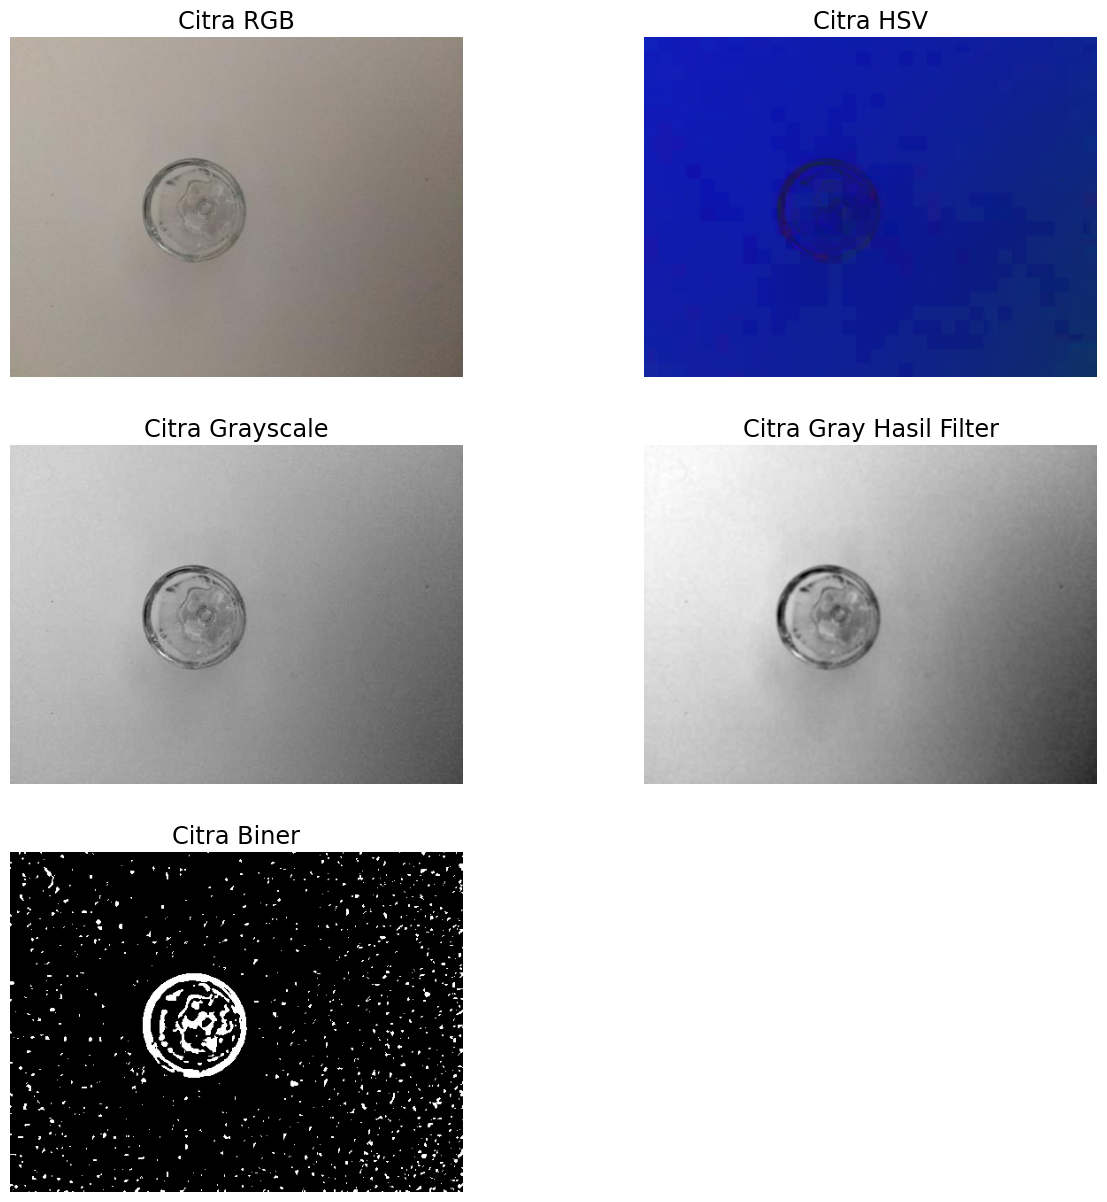

In [ ]:
img_hsv, img_adaptive_mean, img_class = preprocessing_data()

**Fungsi Ekstraksi Fitur Bentuk - Hu's Moment Invariants**

In [ ]:
def hu_moment(img_binary):
  dump = []
  gray_img = cv2.cvtColor(img_binary,cv2.COLOR_BGR2GRAY) # Mengubah ke 1 Kanal
  hu = cv.HuMoments(cv.moments(gray_img))
  for i in range(0, 7):
    hu[i] = -1 * np.sign(hu[i]) * np.log10(np.abs(hu[i]))
  hu = hu.reshape((1, 7)).tolist()[0]
  dump.append(hu)
  cols = ["Hu1", "Hu2", "Hu3", "Hu4", "Hu5", "Hu6", "Hu7"]
  dataframe = pd.DataFrame(dump, columns=cols)
  return dataframe

In [ ]:
hu = hu_moment(img_adaptive_mean)
hu

,Hu1,Hu2,Hu3,Hu4,Hu5,Hu6,Hu7
0,2.013786,4.854446,8.990558,7.265671,15.74379,9.693625,15.442111


**Fungsi Ekstraksi Fitur Warna - HSV Color Moment**

In [ ]:
def color_moment(img_hsv):
  # Split the channels - h,s,v
  h, s, v = cv2.split(img_hsv)
  # Initialize the color feature
  color_feature = []
  # N = h.shape[0] * h.shape[1]
  # The first central moment - average
  h_mean = np.mean(h)  # np.sum(h)/float(N)
  s_mean = np.mean(s)  # np.sum(s)/float(N)
  v_mean = np.mean(v)  # np.sum(v)/float(N)
  color_feature.extend([h_mean, s_mean, v_mean])
  # The second central moment - standard deviation
  h_std = np.std(h)  # np.sqrt(np.mean(abs(h - h.mean())**2))
  s_std = np.std(s)  # np.sqrt(np.mean(abs(s - s.mean())**2))
  v_std = np.std(v)  # np.sqrt(np.mean(abs(v - v.mean())**2))
  color_feature.extend([h_std, s_std, v_std])
  # The third central moment - the third root of the skewness
  h_skewness = np.mean(abs(h - h.mean())**3)
  s_skewness = np.mean(abs(s - s.mean())**3)
  v_skewness = np.mean(abs(v - v.mean())**3)
  h_thirdMoment = h_skewness**(1./3)
  s_thirdMoment = s_skewness**(1./3)
  v_thirdMoment = v_skewness**(1./3)
  color_feature.extend([h_thirdMoment, s_thirdMoment, v_thirdMoment])
  cols = ["meanH", "meanS", "meanV", "stdH", "stdS", "stdV", "skewH", "skewS", "skewV"]
  dataframe = pd.DataFrame([color_feature], columns=cols)
  return dataframe

In [ ]:
color_moment = color_moment(img_hsv)
color_moment

,meanH,meanS,meanV,stdH,stdS,stdV,skewH,skewS,skewV
0,14.643804,29.009577,151.285711,2.712982,5.55307,20.101661,3.89992,6.727778,22.633146


**Model Pelatihan SVM**

In [ ]:
# X_test_tunggal = hu
X_test_tunggal = color_moment
X_test_tunggal = scaler.transform(X_test_tunggal) # transform dengan scale data latih di atas

In [ ]:
X_test_tunggal

array([[0.02220925, 0.15547658, 0.48247711, 0.02634833, 0.03227438,
        0.13962451, 0.04001722, 0.03216213, 0.14867943]])

In [ ]:
if img_class == "cardboard":
  y_test_tunggal = np.array([1])
elif img_class == "glass":
  y_test_tunggal = np.array([2])
elif img_class == "metal":
  y_test_tunggal = np.array([3])
elif img_class == "paper":
  y_test_tunggal = np.array([4])
elif img_class == "plastic":
  y_test_tunggal = np.array([5])
else:
  y_test_tunggal = np.array([0])

y_test_tunggal

array([2])

In [ ]:
ser = pd.Series(y_test_tunggal)

In [ ]:
#load your model for further usage
# result = joblib.load("/content/drive/MyDrive/rbf_1a_2a.pkl")
result = joblib.load("/content/drive/MyDrive/rbf_1b_2a.pkl")

In [ ]:
print(result)
print(result.best_params_)
print(result.best_score_)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=SVC(),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               10000],
                         'decision_function_shape': ['ovr'],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 'scale', 'auto'],
                         'kernel': ['rbf']})
{'C': 100, 'decision_function_shape': 'ovr', 'gamma': 'scale', 'kernel': 'rbf'}
0.7563931955211024


In [ ]:
# Score the grid search model with the testing data
print(f'{result.score(X_test_tunggal, ser)}')

1.0


In [ ]:
clf = SVM(**result.best_params_)
clf.fit(X_train, y_train)

SVC(C=100)

In [ ]:
prediksi = clf.predict(X_test_tunggal)
if prediksi[0] == 1:
  kelas_prediksi = "cardboard"
elif prediksi[0] == 2:
  kelas_prediksi = "glass"
elif prediksi[0] == 3:
  kelas_prediksi = "metal"
elif prediksi[0] == 4:
  kelas_prediksi = "paper"
elif prediksi[0] == 5:
  kelas_prediksi = "plastic"
else:
  kelas_prediksi = 0
print(f"Hasil Prediksi : {kelas_prediksi}")

akurasi = clf.score(X_test_tunggal, y_test_tunggal)
print(f"Akurasi yang dicapai : {akurasi}")

Hasil Prediksi : glass
Akurasi yang dicapai : 1.0
